Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
233                               NaN                 Grenada  12.116500   
234                               NaN              Mozambique -18.665695   
235                               NaN                   Syria  34.802075   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.32850

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brazil -14.235000   
..                                ...                     ...        ...   
235                               NaN                 Grenada  12.116500   
236                               NaN              Mozambique -18.665695   
237                               NaN                   Syria  34.802075   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.32850

In [5]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/2/20  \
185        0        0        0        0        0        0  ...      57   
186        0        0        0        0        0        0  ...     209   
187        0        0        0        0        0        0  ...       3   
188        0        0        0        0        0        0  ...     115   
189        0        0        0        0        0        0  ...      30   
190        0        0        0        0        0        0  ...       0   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...      30   
194        0        0        0        0        0        0  ...      21   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20   Population   \
185      71      79      94     107     129     159     174    37,980,000   
186     246     266     295     311     345     380     409    10,290,000   
187       3       3       4       4       6       6       6           NaN   
188     133     146     151     176     197     220     248    19,530,000   
189      34      43      45      47      58      63      76   144,500,000   
190       0       0       0       0       0       0       0           NaN   
191       0       0       0       0       0       0       0           NaN   
192       0       0       0       0       0       0       0           NaN   
193      30      32      32      32      34      34      34           NaN   
194      25      29      34      38      41      41      44           NaN   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 85 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/2/20  4/3/20  4/4/20  4/5/20  \
175        0        0        0        0  ...      57      57      61      61   
176        0        0        0        0  ...     125     126     131     211   
177        0        0        0        0  ...       9      10      13      13   
178        0        0        0        0  ...       0       0       0       0   
179        0        0        0        0  ...       2       6      12      12   
180        0        0        0        0  ...     537     537     914     989   
181        0        0        0        0  ...      51      52      57      64   
182        0        0        0        0  ...      56      56     116     134   
183        0        0        0        0  ...      68      68      75      75   
184        0        0        0        0  ...      72      93     109     123   

     4/6/20  4/7/20  4/8/20  4/9/20   Population                 region  
175      61      67      72     109     4,636,000              Oman_nan  
176     259     429     467     572   197,000,000          Pakistan_nan  
177      13      14      16      16           NaN            Panama_nan  
178       0       0       0       0           NaN  Papua New Guinea_nan  
179      12      15      15      18           NaN          Paraguay_nan  
180     997    1301    1333    1438           NaN              Peru_nan  
181      73      84      96     124   104,900,000       Philippines_nan  
182     162     191     222     284    37,980,000            Poland_nan  
183     140     184     196     205    10,290,000          Portugal_nan  
184     131     150     178     206           NaN             Qatar_nan  

[10 rows x 85 columns]

In [7]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/2/20  \
185        0        0        0        0        0        0  ...    2946   
186        0        0        0        0        0        0  ...    9034   
187        0        0        0        0        0        0  ...     949   
188        0        0        0        0        0        0  ...    2738   
189        0        0        0        0        0        0  ...    3548   
190        0        0        0        0        0        0  ...      84   
191        0        0        0        0        0        0  ...      13   
192        0        0        0        0        0        0  ...       2   
193        0        0        0        0        0        0  ...     245   
194        0        0        0        0        0        0  ...    1885   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20   Population   \
185    3383    3627    4102    4413    4848    5205    5575    37,980,000   
186    9886   10524   11278   11730   12442   13141   13956    10,290,000   
187    1075    1325    1604    1832    2057    2210    2376           NaN   
188    3183    3613    3864    4057    4417    4761    5202    19,530,000   
189    4149    4731    5389    6343    7497    8672   10131   144,500,000   
190      89     102     104     105     105     110     110           NaN   
191      13      14      14      14      14      14      14           NaN   
192       3       7       7       7       8       8      12           NaN   
193     245     259     266     266     279     279     333           NaN   
194    2039    2179    2402    2605    2795    2932    3287           NaN   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 85 columns]

In [8]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/2/20  4/3/20  4/4/20  4/5/20  \
220        0        0        0        0  ...      28      28      35      35   
221        0        0        0        0  ...     193     232     262     309   
222        0        0        0        0  ...      88      95      98     103   
223        0        0        0        0  ...      95     114     126     127   
224        0        0        0        0  ...       5       6       6       6   
225        0        0        0        0  ...   33718   38168   41903   47806   
226        0        0        0        0  ...     350     369     400     400   
227        2        2        5        5  ...  243762  275586  308853  337072   
228        0        0        0        0  ...     205     227     266     342   
229        0        0        0        0  ...     146     153     155     159   

     4/6/20  4/7/20  4/8/20  4/9/20   Population   \
220      39      45      45      45           NaN   
221     323     335     351     361           NaN   
222     109     113     120     123           NaN   
223     139     150     158     190           NaN   
224       6       9       9       9           NaN   
225   51608   55242   60733   65077    66,440,000   
226     406     424     424     456           NaN   
227  366667  396223  429052  461437   327,200,000   
228     457     520     545     582           NaN   
229     165     165     167     171           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 85 columns]

## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

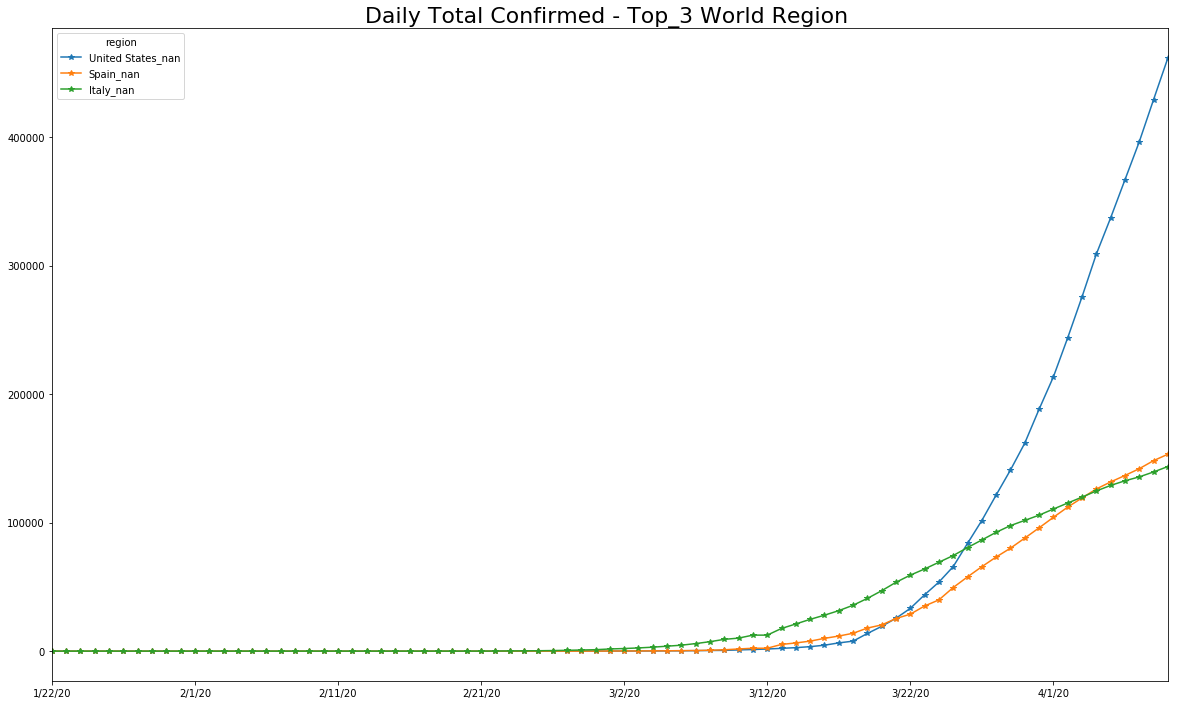

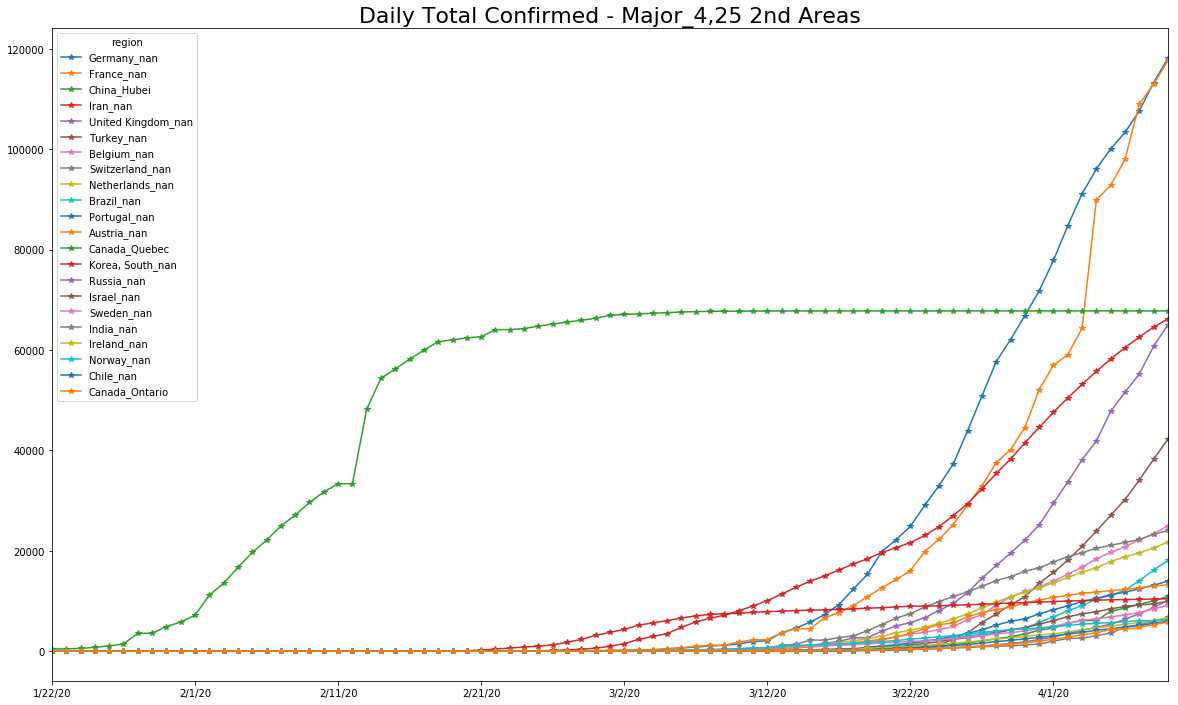

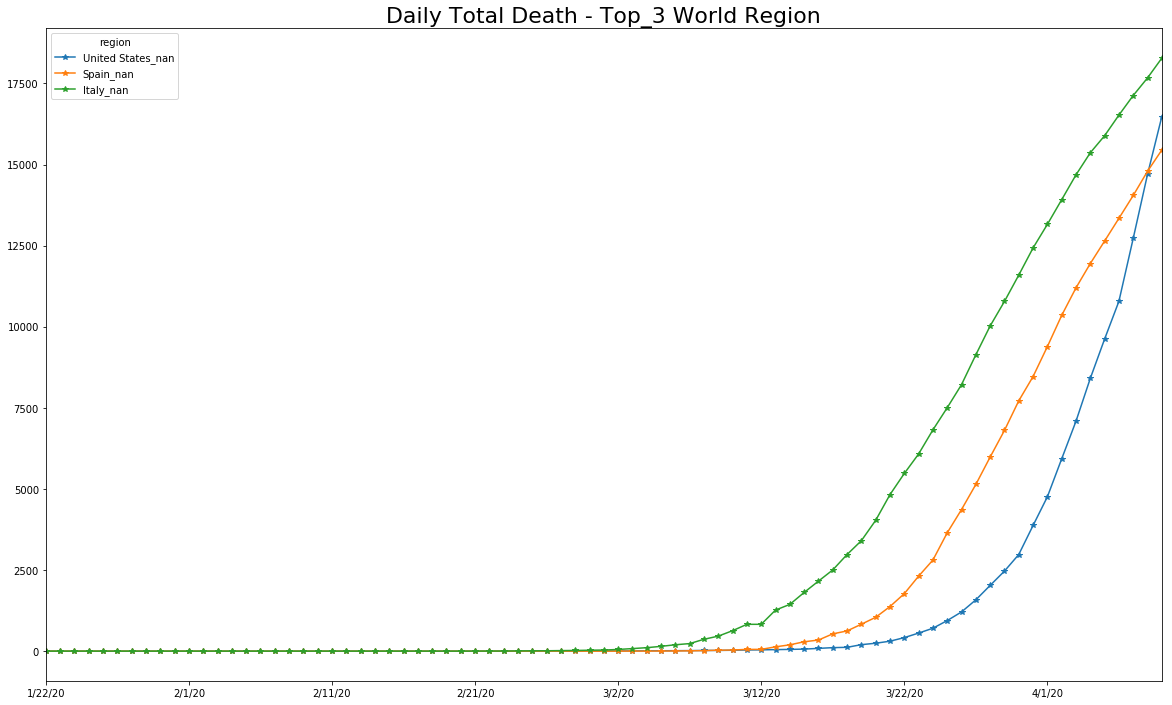

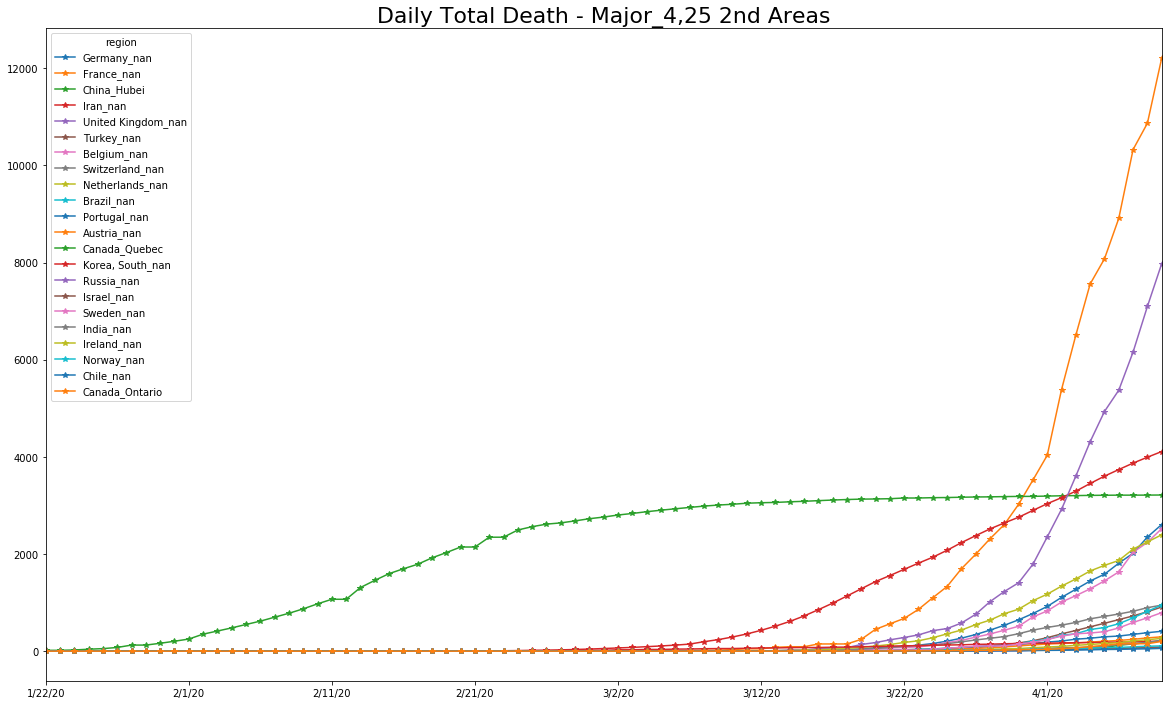

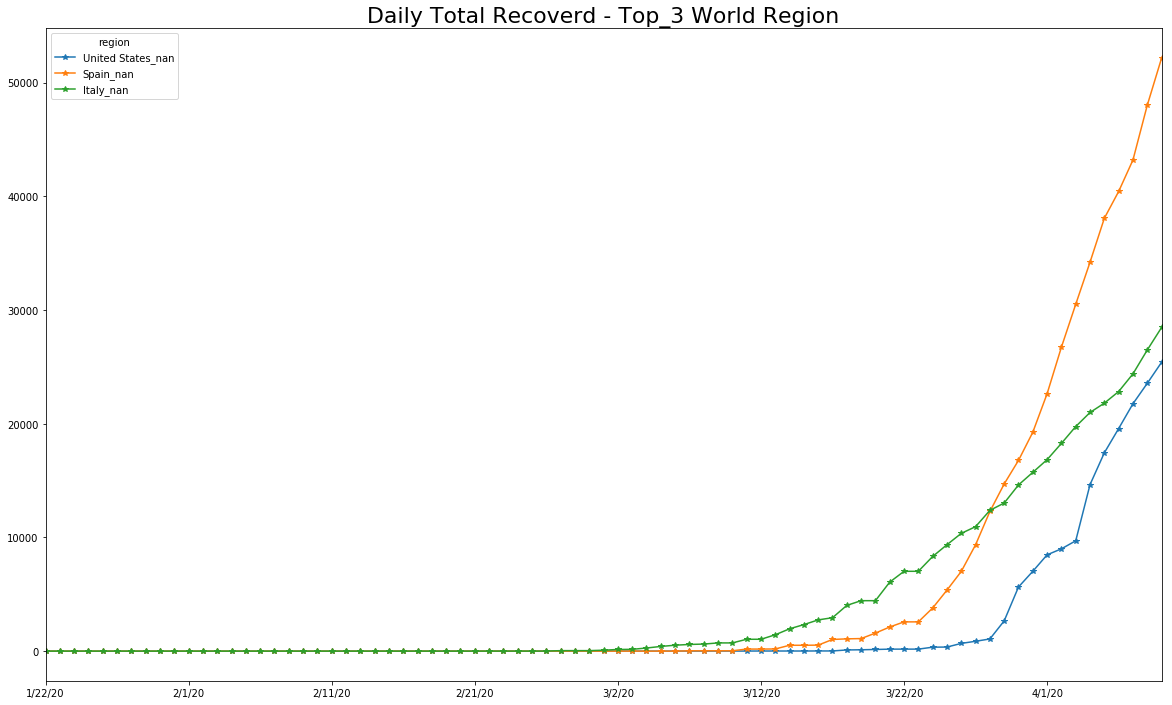

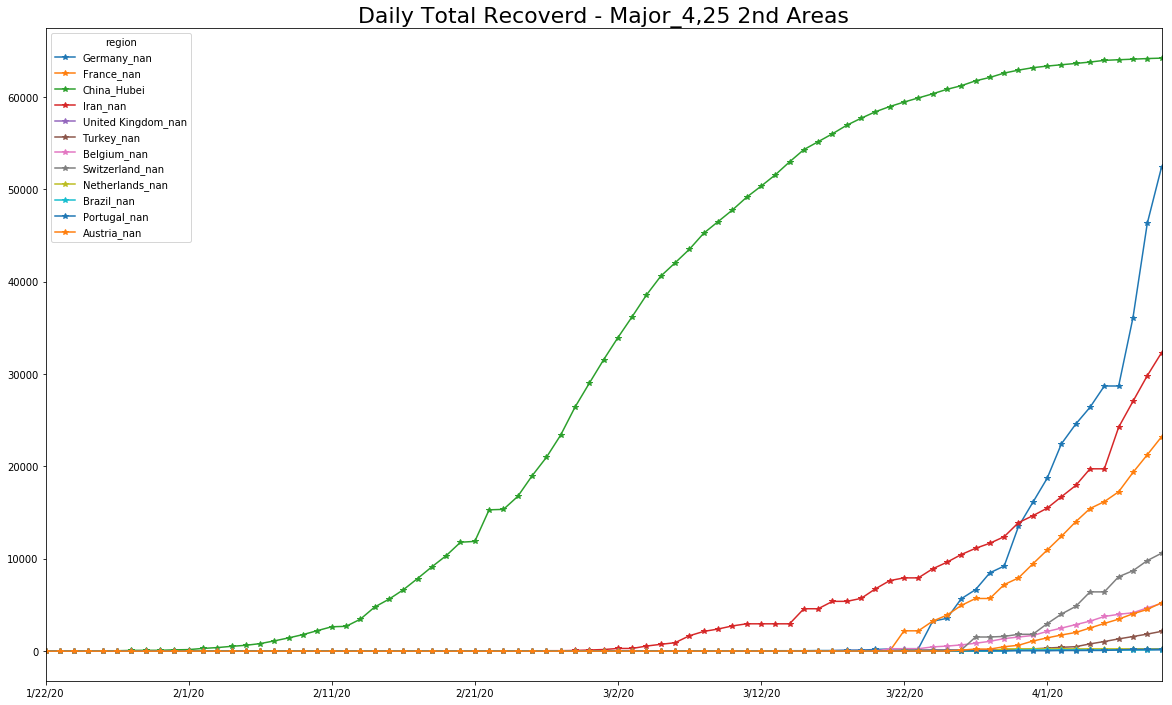

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [12]:

#!pip install pyweatherbit

In [13]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [13]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [ ]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-04-10'
offset_days=0 #-1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=3

my_weather_fetch_list= my_train_list # ['Iran_nan'] #['Brazil_nan'] #

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

In [24]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [25]:
w[:]

date                     region   min   max
0   2020/04/11  Australia_New South Wales  16.9  22.3
1   2020/04/11                Belgium_nan   8.3  23.9
2   2020/04/11                 Brazil_nan  18.9  30.6
3   2020/04/11                 Brazil_nan  18.9  30.6
4   2020/04/11             Canada_Ontario  -9.0  -2.1
5   2020/04/11              China_Beijing   5.0  18.0
6   2020/04/11            China_Guangdong  19.0  27.0
7   2020/04/11            China_Hong Kong  17.5  20.8
8   2020/04/11                China_Hubei  10.0  21.0
9   2020/04/11                China_Macau  19.0  22.1
10  2020/04/11             China_Shanghai  13.7  20.9
11  2020/04/11                Finland_nan  -4.4   2.2
12  2020/04/11                Finland_nan  -4.4   2.2
13  2020/04/11                 France_nan   6.2  23.0
14  2020/04/11                Germany_nan   4.0  18.0
15  2020/04/11                  India_nan  23.0  38.0
16  2020/04/11                   Iran_nan  10.0  14.8
17  2020/04/11                  Italy_nan   7.7  20.1
18  2020/04/11                  Japan_nan  -2.2   9.4
19  2020/04/11           Korea, South_nan   2.0  17.0
20  2020/04/11               Malaysia_nan  24.0  31.0
21  2020/04/11            Netherlands_nan   8.9  21.1
22  2020/04/11                 Norway_nan  -7.8  -0.6
23  2020/04/11            Philippines_nan  25.0  32.2
24  2020/04/11                 Poland_nan   1.7  14.4
25  2020/04/11               Portugal_nan  14.0  17.9
26  2020/04/11                 Russia_nan  -3.0   2.0
27  2020/04/11              Singapore_nan  25.5  34.0
28  2020/04/11                  Spain_nan  12.2  17.3
29  2020/04/11                 Sweden_nan  -2.2   6.7
30  2020/04/11            Switzerland_nan   8.5  17.7
31  2020/04/11                Taiwan*_nan  13.2  26.0
32  2020/04/11                 Turkey_nan   5.6  12.5
33  2020/04/11         United Kingdom_nan   5.0  13.3
34  2020/04/11          United States_nan   0.7  10.7
35  2020/04/11                Vietnam_nan  24.0  30.0
36  2020/04/12  Australia_New South Wales  16.1  17.2

In [18]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [14]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

ts=ts[29:]
ts_d=ts_d[29:]
ts_rec=ts_rec[29:]

In [15]:
ts[:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/20/20                0            0            0            0           0   
2/21/20                0            0            0            0           0   
2/22/20                0            0            0            0           0   
2/23/20                0            0            0            0           0   
2/24/20                1            0            0            0           0   
2/25/20                1            0            1            0           0   
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   
2/29/20                1            0            1            0           0   
3/1/20                 1            0            1            0           0   
3/2/20                 1            0            3            1           0   
3/3/20                 1            0            5            1           0   
3/4/20                 1            0           12            1           0   
3/5/20                 1            0           12            1           0   
3/6/20                 1            0           17            1           0   
3/7/20                 1            0           17            1           0   
3/8/20                 4            0           19            1           0   
3/9/20                 4            2           20            1           0   
3/10/20                5           10           20            1           0   
3/11/20                7           12           20            1           0   
3/12/20                7           23           24            1           0   
3/13/20                7           33           26            1           0   
3/14/20               11           38           37            1           0   
3/15/20               16           42           48            1           0   
3/16/20               21           51           54            2           0   
3/17/20               22           55           60           39           0   
3/18/20               22           59           74           39           0   
3/19/20               22           64           87           53           0   
3/20/20               24           70           90           75           1   
3/21/20               24           76          139           88           2   
3/22/20               40           89          201          113           2   
3/23/20               40          104          230          133           3   
3/24/20               74          123          264          164           3   
3/25/20               84          146          302          188           3   
3/26/20               94          174          367          224           4   
3/27/20              110          186          409          267           4   
3/28/20              110          197          454          308           5   
3/29/20              120          212          511          334           7   
3/30/20              170          223          584          370           7   
3/31/20              174          243          716          376           7   
4/1/20               237          259          847          390           8   
4/2/20               273          277          986          428           8   
4/3/20               281          304         1171          439           8   
4/4/20               299          333         1251          466          10   
4/5/20               349          361         1320          501          14   
4/6/20               367          377         1423          525          16   
4/7/20               423          383         1468          545          17   
4/8/20               444          400         1572          564          19   
4/9/20               484          409         1666

In [16]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [17]:
#!pip install rpy2


In [18]:
import rpy2
%load_ext rpy2.ipython

In [19]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [20]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [21]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [22]:
p=%R pred_all

In [23]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

In [24]:
temp[:]

date           region  confirmed     Y          X      X2
0     2020-02-20  Afghanistan_nan          0   0.0   0.000000  0.0000
1     2020-02-21  Afghanistan_nan          0   0.0   0.000000  0.0000
2     2020-02-22  Afghanistan_nan          0   0.0   0.000000  0.0000
3     2020-02-23  Afghanistan_nan          0   0.0   0.000000  0.0000
4     2020-02-24  Afghanistan_nan          1   1.0   0.000000  0.0000
5     2020-02-25  Afghanistan_nan          1   1.0   0.829164  0.4896
6     2020-02-26  Afghanistan_nan          1   1.0   1.173575  0.5572
7     2020-02-27  Afghanistan_nan          1   1.0   1.308386  0.4961
8     2020-02-28  Afghanistan_nan          1   1.0   1.335020  0.3932
9     2020-02-29  Afghanistan_nan          1   1.0   1.302954  0.2833
10    2020-03-01  Afghanistan_nan          1   1.0   1.242967  0.1841
11    2020-03-02  Afghanistan_nan          1   1.0   1.175804  0.1045
12    2020-03-03  Afghanistan_nan          1   1.0   1.114305  0.0468
13    2020-03-04  Afghanistan_nan          1   1.0   1.064808  0.0093
14    2020-03-05  Afghanistan_nan          1   1.0   1.028990 -0.0120
15    2020-03-06  Afghanistan_nan          1   1.0   1.005717 -0.0215
16    2020-03-07  Afghanistan_nan          1   1.0   0.992530 -0.0233
17    2020-03-08  Afghanistan_nan          4   4.0   0.986636 -0.0209
18    2020-03-09  Afghanistan_nan          4   4.0   2.836291  0.9669
19    2020-03-10  Afghanistan_nan          5   5.0   3.989300  1.3483
20    2020-03-11  Afghanistan_nan          7   7.0   5.219561  1.6796
21    2020-03-12  Afghanistan_nan          7   7.0   7.073759  2.2633
22    2020-03-13  Afghanistan_nan          7   7.0   8.046721  2.2391
23    2020-03-14  Afghanistan_nan         11  11.0   8.408578  1.8960
24    2020-03-15  Afghanistan_nan         16  16.0  10.860422  2.7454
25    2020-03-16  Afghanistan_nan         21  21.0  15.266484  4.4301
26    2020-03-17  Afghanistan_nan         22  22.0  20.797066  6.3095
27    2020-03-18  Afghanistan_nan         22  22.0  24.378445  6.7038
28    2020-03-19  Afghanistan_nan         22  22.0  25.927900  5.9242
29    2020-03-20  Afghanistan_nan         24  24.0  26.170656  4.6367
...          ...              ...        ...   ...        ...     ...
13383 2020-03-12     Zimbabwe_nan          0   0.0   0.000000  0.0000
13384 2020-03-13     Zimbabwe_nan          0   0.0   0.000000  0.0000
13385 2020-03-14     Zimbabwe_nan          0   0.0   0.000000  0.0000
13386 2020-03-15     Zimbabwe_nan          0   0.0   0.000000  0.0000
13387 2020-03-16     Zimbabwe_nan          0   0.0   0.000000  0.0000
13388 2020-03-17     Zimbabwe_nan          0   0.0   0.000000  0.0000
13389 2020-03-18     Zimbabwe_nan          0   0.0   0.000000  0.0000
13390 2020-03-19     Zimbabwe_nan          0   0.0   0.000000  0.0000
13391 2020-03-20     Zimbabwe_nan          1   1.0   0.000000  0.0000
13392 2020-03-21     Zimbabwe_nan          3   3.0   0.616903  0.3278
13393 2020-03-22     Zimbabwe_nan          3   3.0   2.234549  1.1089
13394 2020-03-23     Zimbabwe_nan          3   3.0   3.205785  1.3599
13395 2020-03-24     Zimbabwe_nan          3   3.0   3.690772  1.2924
13396 2020-03-25     Zimbabwe_nan          3   3.0   3.846214  1.0660
13397 2020-03-26     Zimbabwe_nan          3   3.0   3.803870  0.7886
13398 2020-03-27     Zimbabwe_nan          5   5.0   3.662827  0.5251
13399 2020-03-28     Zimbabwe_nan          7   7.0   4.724024  0.9634
13400 2020-03-29     Zimbabwe_nan          7   7.0   6.561613  1.7094
13401 2020-03-30     Zimbabwe_nan          7   7.0   7.601308  1.8531
13402 2020-03-31     Zimbabwe_nan          8   8.0   8.064276  1.6560
13403 2020-04-01     Zimbabwe_nan          8   8.0   8.769844  1.6350
13404 2020-04-02     Zimbabwe_nan          9   9.0   9.030664  1.3826
13405 2020-04-03     Zimbabwe_nan          9   9.0   9.633930  1.3726
13406 2020-04-04     Zimbabwe_nan          9   9.0   9.860516  1.1648
13407 2020-04-05     Zimbabwe_nan          9   9.0   9.853812  0.8827
13408 2020-04-06     Z

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [25]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [26]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [27]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [28]:
w_in_model.tail(10)

date       region   min   max
5815 2020-04-02  Vietnam_nan  25.3  30.0
5816 2020-04-03  Vietnam_nan  25.0  33.0
5817 2020-04-04  Vietnam_nan  26.0  32.0
5818 2020-04-05  Vietnam_nan  24.7  32.0
5819 2020-04-06  Vietnam_nan  25.0  32.0
5820 2020-04-07  Vietnam_nan  24.0  30.0
5821 2020-04-08  Vietnam_nan  24.0  28.0
5822 2020-04-09  Vietnam_nan  24.0  28.0
5823 2020-04-10  Vietnam_nan  24.0  30.0
5824 2020-04-11  Vietnam_nan  24.0  30.0

### Build Train Set Data Structure

In [29]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [30]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [31]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
5     2020-02-25  Afghanistan_nan          1             1             1   
6     2020-02-26  Afghanistan_nan          1             0             1   
7     2020-02-27  Afghanistan_nan          1             0             1   
8     2020-02-28  Afghanistan_nan          1             0             0   
9     2020-02-29  Afghanistan_nan          1             0             0   
10    2020-03-01  Afghanistan_nan          1             0             0   
11    2020-03-02  Afghanistan_nan          1             0             0   
12    2020-03-03  Afghanistan_nan          1             0             0   
13    2020-03-04  Afghanistan_nan          1             0             0   
14    2020-03-05  Afghanistan_nan          1             0             0   
15    2020-03-06  Afghanistan_nan          1             0             0   
16    2020-03-07  Afghanistan_nan          1             0             0   
17    2020-03-08  Afghanistan_nan          4             0             0   
18    2020-03-09  Afghanistan_nan          4             3             3   
19    2020-03-10  Afghanistan_nan          5             0             3   
20    2020-03-11  Afghanistan_nan          7             1             4   
21    2020-03-12  Afghanistan_nan          7             2             3   
22    2020-03-13  Afghanistan_nan          7             0             3   
23    2020-03-14  Afghanistan_nan         11             0             2   
24    2020-03-15  Afghanistan_nan         16             4             4   
25    2020-03-16  Afghanistan_nan         21             5             9   
26    2020-03-17  Afghanistan_nan         22             5            14   
27    2020-03-18  Afghanistan_nan         22             1            11   
28    2020-03-19  Afghanistan_nan         22             0             6   
29    2020-03-20  Afghanistan_nan         24             0             1   
30    2020-03-21  Afghanistan_nan         24             2             2   
31    2020-03-22  Afghanistan_nan         40             0             2   
32    2020-03-23  Afghanistan_nan         40            16            18   
33    2020-03-24  Afghanistan_nan         74             0            16   
34    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
13455 2020-04-02       Zambia_nan         39             1             7   
13456 2020-04-03       Zambia_nan         39             3             4   
13457 2020-04-04       Zambia_nan         39             0             4   
13458 2020-04-05       Zambia_nan         39             0             3   
13459 2020-04-06       Zambia_nan         39             0             0   
13460 2020-04-07       Zambia_nan         39             0             0   
13461 2020-04-08       Zambia_nan         39             0             0   
13462 2020-04-09       Zambia_nan         39             0             0   
13463 2020-04-10       Zambia_nan          0             0             0   
13494 2020-03-21     Zimbabwe_nan          3             1             1   
13495 2020-03-22     Zimbabwe_nan          3             2             3   
13496 2020-03-23     Zimbabwe_nan          3             0             3   
13497 2020-03-24     Zimbabwe_nan          3             0             2   
13498 2020-03-25     Zimbabwe_nan          3             0             0   
13499 2020-03-26     Zimbabwe_nan          3             0             0   
13500 2020-03-27     Zimbabwe_nan          5             0             0   
13501 2020-03-28     Zimbabwe_nan          7             2             2   
13502 2020-03-29     Zimbabwe_nan          7             2             4   
13503 2020-03-30     Zimbabwe_nan          7             0             4   
13504 2020-03-31     Zimbabwe_nan          8             0             2   
13505 2020-04-01     Zimbabwe_nan          8             1  

In [32]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [33]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date        region  confirmed  1_day_change  3_day_change  \
51    2020-02-20   Albania_nan          0             0             0   
52    2020-02-21   Albania_nan          0             0             0   
53    2020-02-22   Albania_nan          0             0             0   
54    2020-02-23   Albania_nan          0             0             0   
55    2020-02-24   Albania_nan          0             0             0   
56    2020-02-25   Albania_nan          0             0             0   
57    2020-02-26   Albania_nan          0             0             0   
58    2020-02-27   Albania_nan          0             0             0   
59    2020-02-28   Albania_nan          0             0             0   
60    2020-02-29   Albania_nan          0             0             0   
61    2020-03-01   Albania_nan          0             0             0   
62    2020-03-02   Albania_nan          0             0             0   
63    2020-03-03   Albania_nan          0             0             0   
64    2020-03-04   Albania_nan          0             0             0   
65    2020-03-05   Albania_nan          0             0             0   
66    2020-03-06   Albania_nan          0             0             0   
67    2020-03-07   Albania_nan          0             0             0   
68    2020-03-08   Albania_nan          0             0             0   
69    2020-03-09   Albania_nan          2             0             0   
70    2020-03-10   Albania_nan         10             2             2   
71    2020-03-11   Albania_nan         12             8            10   
72    2020-03-12   Albania_nan         23             2            12   
73    2020-03-13   Albania_nan         33            11            21   
74    2020-03-14   Albania_nan         38            10            23   
75    2020-03-15   Albania_nan         42             5            26   
76    2020-03-16   Albania_nan         51             4            19   
77    2020-03-17   Albania_nan         55             9            18   
78    2020-03-18   Albania_nan         59             4            17   
79    2020-03-19   Albania_nan         64             4            17   
80    2020-03-20   Albania_nan         70             5            13   
...          ...           ...        ...           ...           ...   
13485 2020-03-12  Zimbabwe_nan          0             0             0   
13486 2020-03-13  Zimbabwe_nan          0             0             0   
13487 2020-03-14  Zimbabwe_nan          0             0             0   
13488 2020-03-15  Zimbabwe_nan          0             0             0   
13489 2020-03-16  Zimbabwe_nan          0             0             0   
13490 2020-03-17  Zimbabwe_nan          0             0             0   
13491 2020-03-18  Zimbabwe_nan          0             0             0   
13492 2020-03-19  Zimbabwe_nan          0             0             0   
13493 2020-03-20  Zimbabwe_nan          1             0             0   
13494 2020-03-21  Zimbabwe_nan          3             1             1   
13495 2020-03-22  Zimbabwe_nan          3             2             3   
13496 2020-03-23  Zimbabwe_nan          3             0             3   
13497 2020-03-24  Zimbabwe_nan          3             0             2   
13498 2020-03-25  Zimbabwe_nan          3             0             0   
13499 2020-03-26  Zimbabwe_nan          3             0             0   
13500 2020-03-27  Zimbabwe_nan          5             0             0   
13501 2020-03-28  Zimbabwe_nan          7             2             2   
13502 2020-03-29  Zimbabwe_nan          7             2             4   
13503 2020-03-30  Zimbabwe_nan          7             0             4   
13504 2020-03-31  Zimbabwe_nan          8             0             2   
13505 2020-04-01  Zimbabwe_nan          8             1             1   
13506 2020-04-02  Zimbabwe_nan          9             0             1   
13507 2020-04-03  Zimbabwe_nan          9             1             2 

## Kalman 1 day Prediction with Evaluation

        region           mse          rmse      mae
149  Italy_nan  4.383652e+08  20937.172963  4030.92


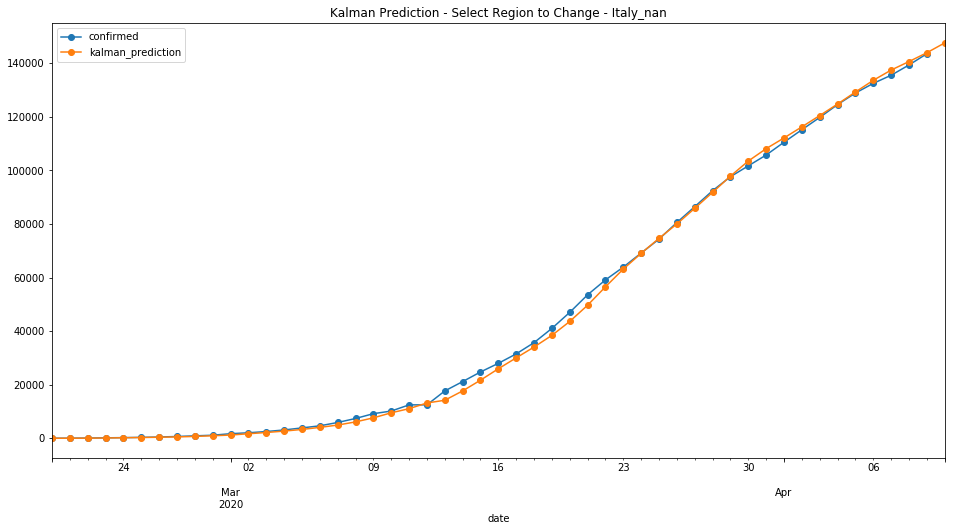

In [34]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region          mse          rmse      mae
225  Spain_nan  516150822.8  22718.952942  4599.88


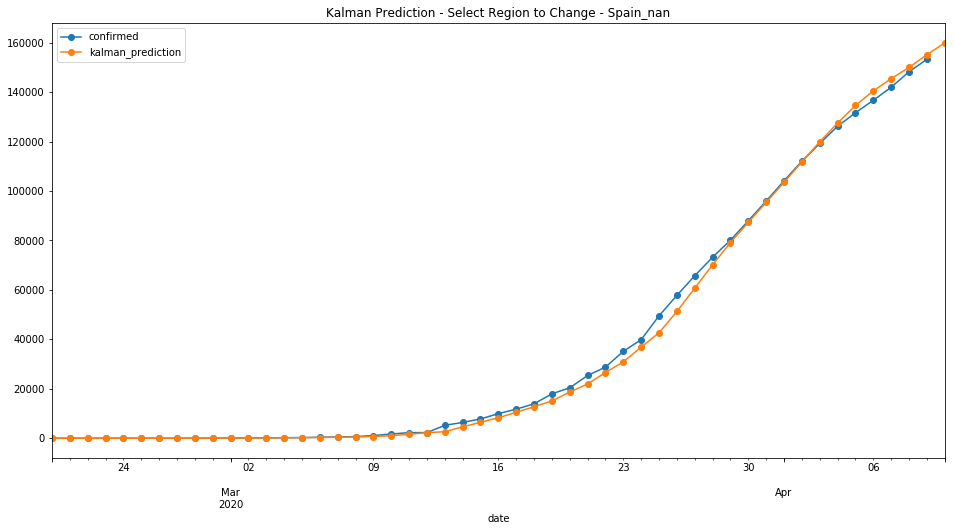

In [35]:
# Select region
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region          mse         rmse      mae
253  United Kingdom_nan  97651060.08  9881.855093  2023.84


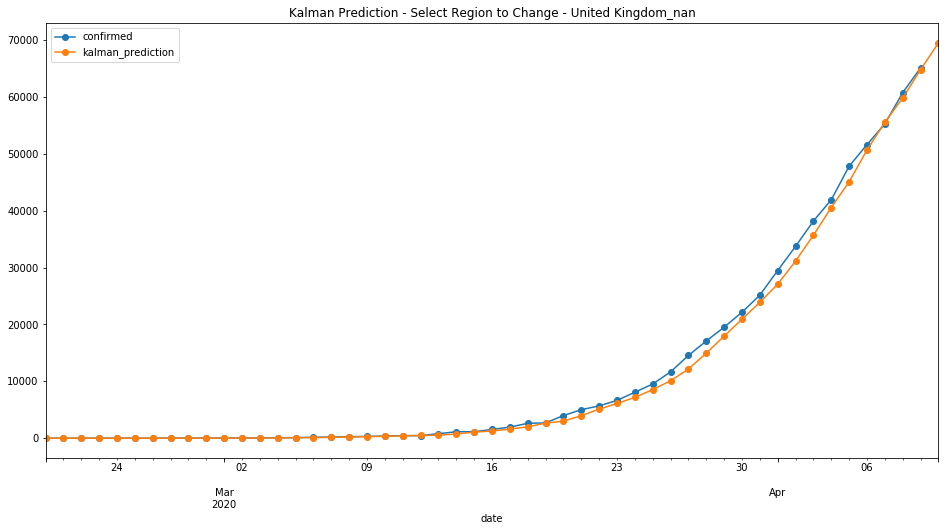

In [36]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse         rmse       mae
254  United States_nan  4.873194e+09  69808.26627  14082.38


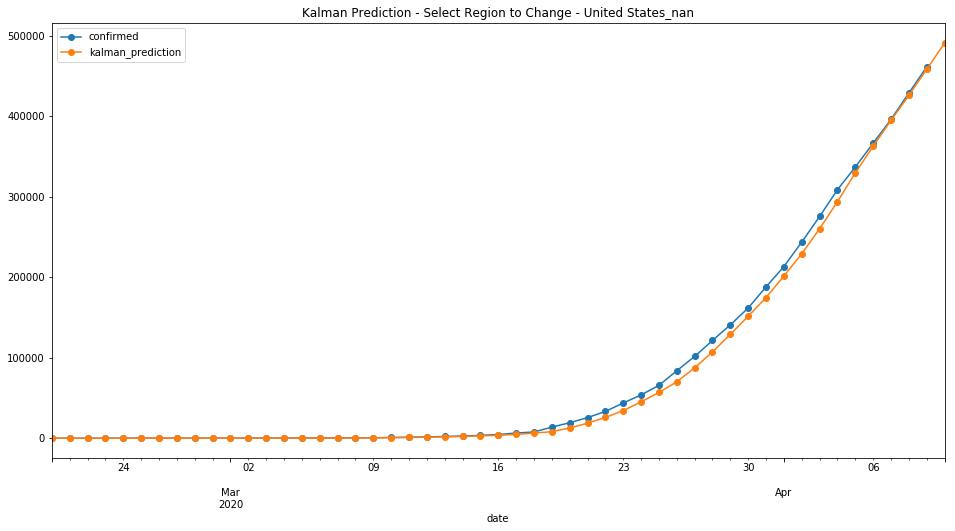

In [37]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

          region           mse          rmse      mae
130  Germany_nan  3.044220e+08  17447.693394  3497.66


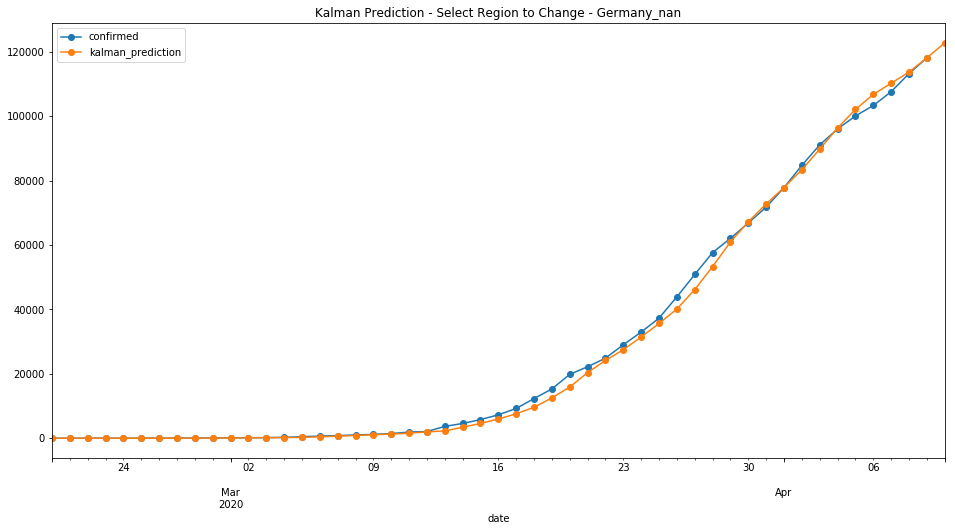

In [38]:
# Select region
region='Germany_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse     mae
126  France_nan  3.413145e+08  18474.699533  4033.5


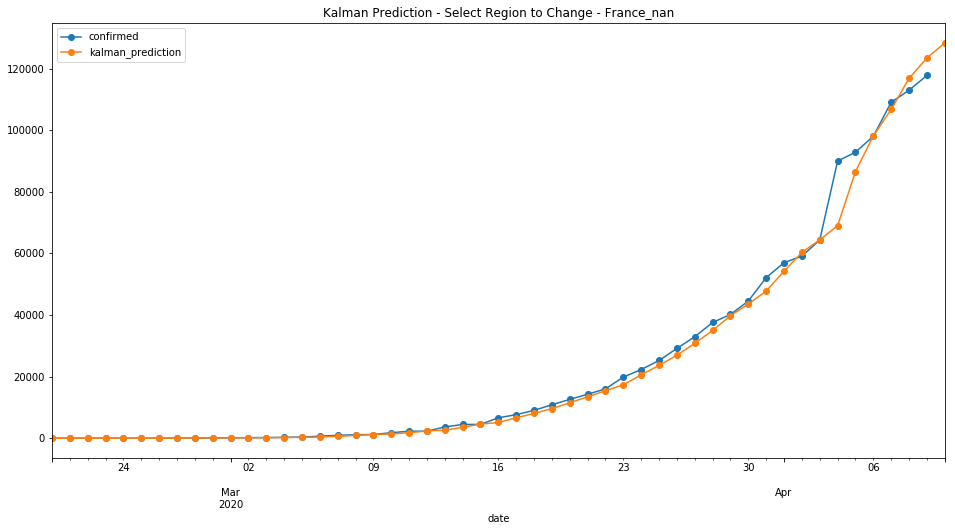

In [39]:
# Select region
region='France_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region          mse         rmse    mae
230  Switzerland_nan  12391370.86  3520.137904  711.1


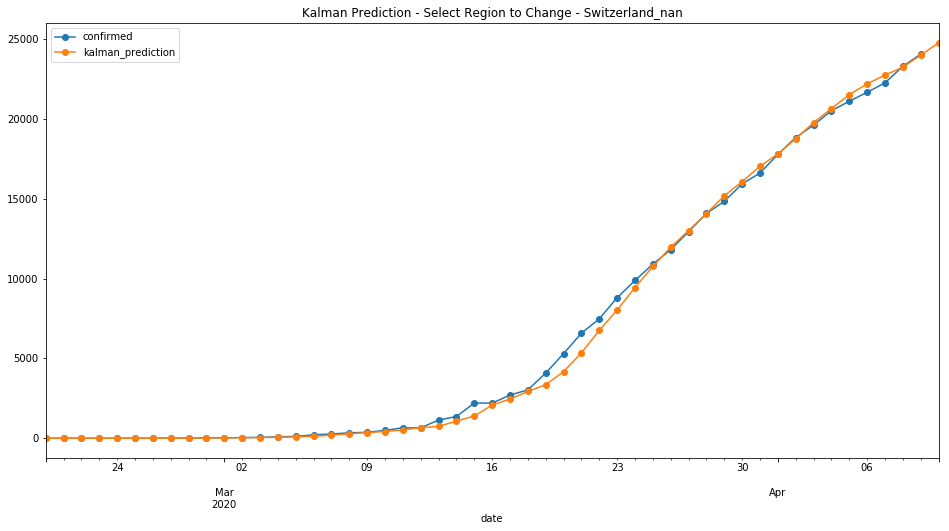

In [40]:
# Select region
region='Switzerland_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region        mse         rmse    mae
16  Austria_nan  3749854.3  1936.454053  449.9


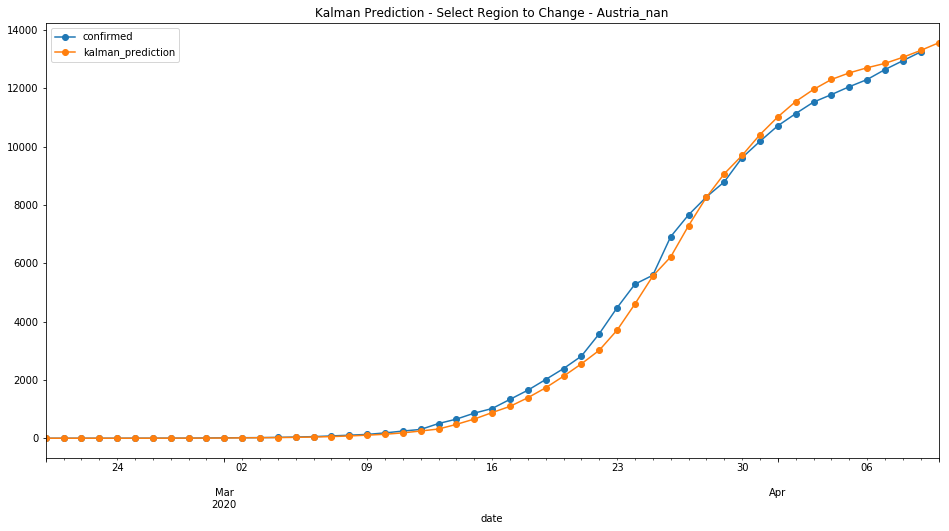

In [41]:
# Select region
region='Austria_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region          mse         rmse      mae
239  Turkey_nan  41303814.16  6426.804351  1394.28


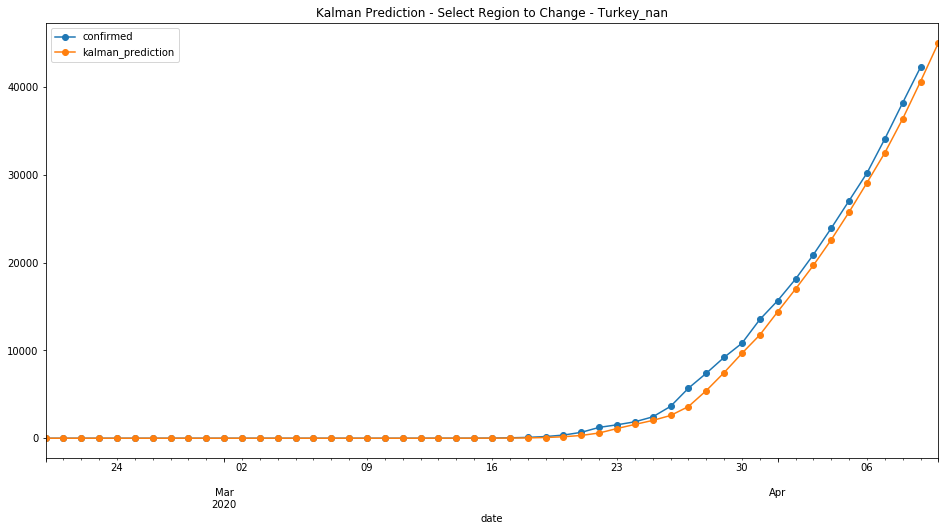

In [42]:
# Select region
region='Turkey_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region         mse         rmse    mae
30  Brazil_nan  7399256.72  2720.157481  597.6


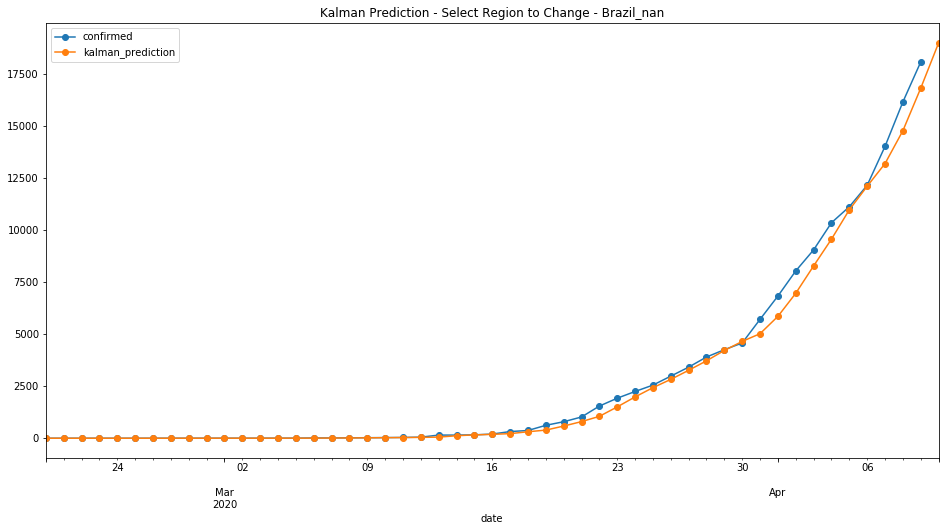

In [43]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region         mse         rmse     mae
204  Portugal_nan  4312501.28  2076.656274  424.72


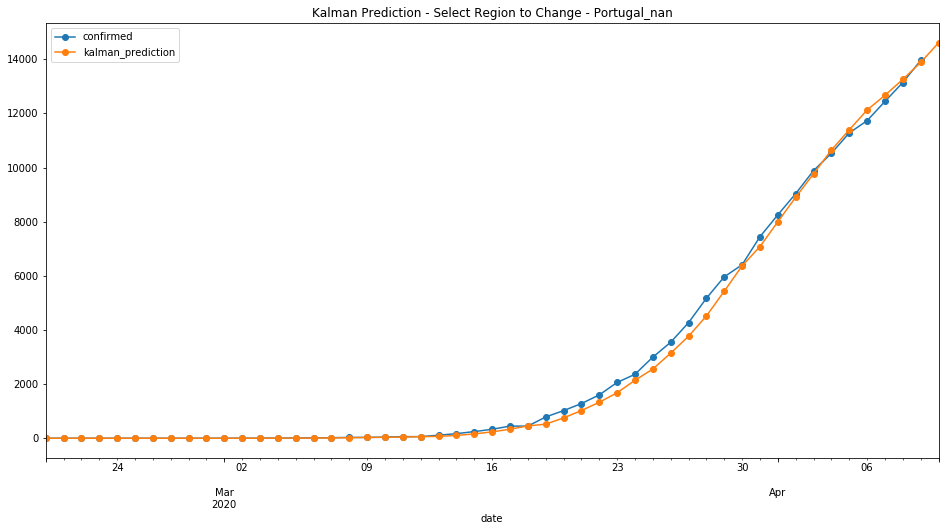

In [44]:
# Select region
region='Portugal_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

               region         mse         rmse     mae
155  Korea, South_nan  2274489.54  1508.141088  375.62


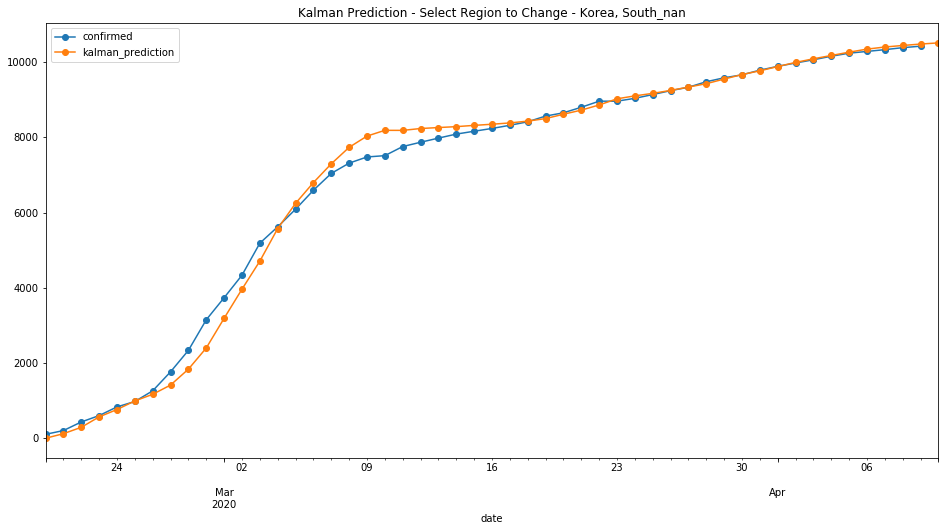

In [45]:
# Select region
region='Korea, South_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

       region          mse         rmse      mae
145  Iran_nan  96089140.42  9802.506844  1948.74


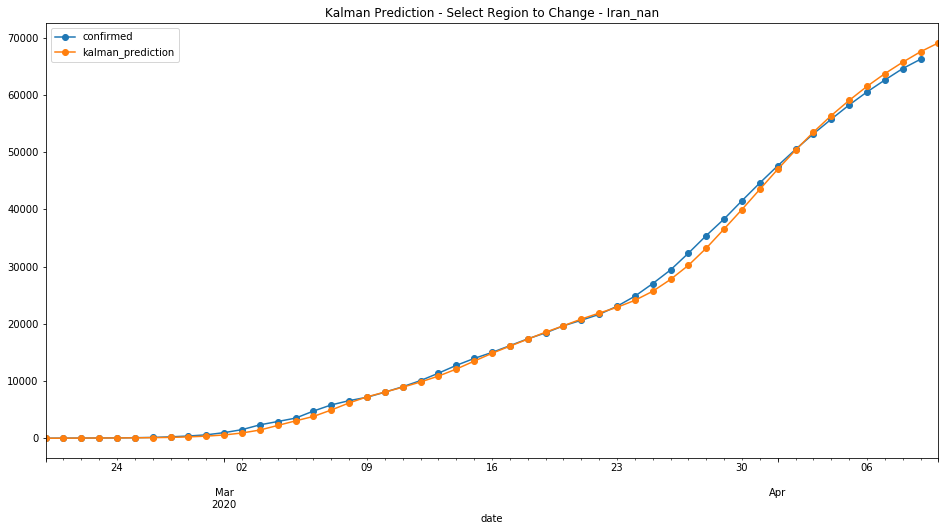

In [46]:
# Select region
region='Iran_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [47]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='6G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptukbocey
  JVM stdout: /tmp/tmptukbocey/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptukbocey/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 14 days !!!
H2O cluster name:           H2O_from_python_unknownUser_h765pj
H2O cluster total nodes:    1
H2O cluster free memory:    6 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [48]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria',
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan', 
         'Vietnam_nan',
       ]
#

In [49]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-04-06']
boots=train_df[train_df['date']>='2020-04-04'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-04-06']]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-04-01']
test=test[test['date']<'2020-04-12']
test_v2=test[test['region'].isin(region_to_train)]

In [50]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [51]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [52]:
pred2.iloc[175:195]

0  confirmed       date          region
175   643.0        641 2020-04-06  Azerbaijan_nan
176   716.0        717 2020-04-07  Azerbaijan_nan
177   784.0        822 2020-04-08  Azerbaijan_nan
178   903.0        926 2020-04-09  Azerbaijan_nan
179  1022.0          0 2020-04-10  Azerbaijan_nan
180    14.0         21 2020-04-01     Bahamas_nan
181    18.0         24 2020-04-02     Bahamas_nan
182    24.0         24 2020-04-03     Bahamas_nan
183    27.0         28 2020-04-04     Bahamas_nan
184    27.0         28 2020-04-05     Bahamas_nan
185    28.0         29 2020-04-06     Bahamas_nan
186    29.0         33 2020-04-07     Bahamas_nan
187    31.0         40 2020-04-08     Bahamas_nan
188    40.0         41 2020-04-09     Bahamas_nan
189    44.0          0 2020-04-10     Bahamas_nan
190   627.0        569 2020-04-01     Bahrain_nan
191   624.0        643 2020-04-02     Bahrain_nan
192   719.0        672 2020-04-03     Bahrain_nan
193   732.0        688 2020-04-04     Bahrain_nan
194   763.0        700 2020-04-05     Bahrain_nan

In [53]:
pred2.iloc[220:240]

0  confirmed       date       region
220    166.0        163 2020-04-01  Belarus_nan
221    190.0        304 2020-04-02  Belarus_nan
222    336.0        351 2020-04-03  Belarus_nan
223    410.0        440 2020-04-04  Belarus_nan
224    541.0        562 2020-04-05  Belarus_nan
225    641.0        700 2020-04-06  Belarus_nan
226    823.0        861 2020-04-07  Belarus_nan
227   1006.0       1066 2020-04-08  Belarus_nan
228   1232.0       1486 2020-04-09  Belarus_nan
229   1749.0          0 2020-04-10  Belarus_nan
230  14259.0      13964 2020-04-01  Belgium_nan
231  15176.0      15348 2020-04-02  Belgium_nan
232  16653.0      16770 2020-04-03  Belgium_nan
233  18218.0      18431 2020-04-04  Belgium_nan
234  20178.0      19691 2020-04-05  Belgium_nan
235  21495.0      20814 2020-04-06  Belgium_nan
236  22468.0      22194 2020-04-07  Belgium_nan
237  23632.0      23403 2020-04-08  Belgium_nan
238  24770.0      24983 2020-04-09  Belgium_nan
239  26460.0          0 2020-04-10  Belgium_nan

In [54]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [55]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.522304e+14           1.000000    0.341635
1            last_day         1.161981e+14           0.763304    0.260772
2        7_day_change         6.903431e+13           0.453486    0.154927
3        3_day_change         4.303591e+13           0.282702    0.096581
4        1_day_change         3.214458e+13           0.211157    0.072139
5       infected_rate         1.565574e+13           0.102842    0.035135
6              region         1.219299e+13           0.080096    0.027364
7   1_day_change_rate         1.213208e+12           0.007970    0.002723
8   3_day_change_rate         1.180354e+12           0.007754    0.002649
9   7_day_change_rate         1.166548e+12           0.007663    0.002618
10                min         8.178978e+11           0.005373    0.001836
11                max         7.233155e+11           0.004751    0.001623

In [56]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


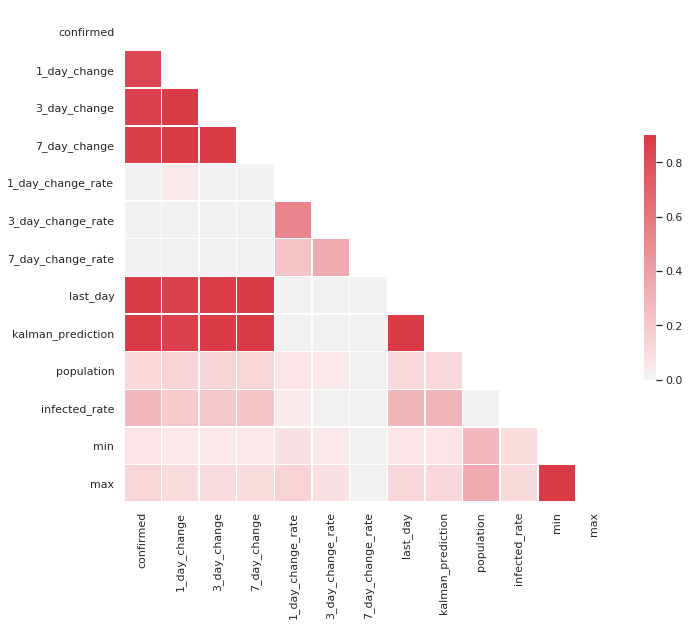

In [57]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [58]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.836931
3_day_change         0.858989
7_day_change         0.873568
1_day_change_rate    0.030693
3_day_change_rate    0.011666
7_day_change_rate    0.002665
last_day             0.923395
kalman_prediction    0.924770
population           0.121414
infected_rate        0.274103
min                  0.063828
max                  0.133569
Name: confirmed, dtype: float64


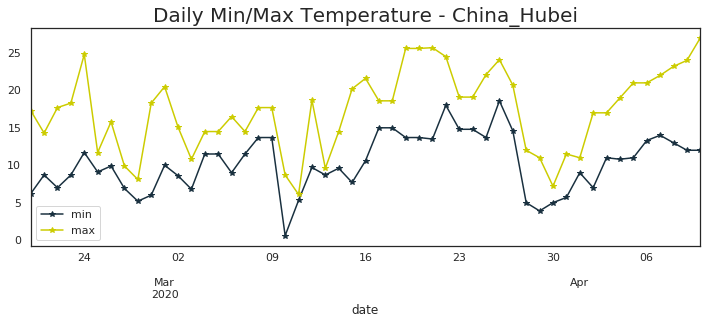

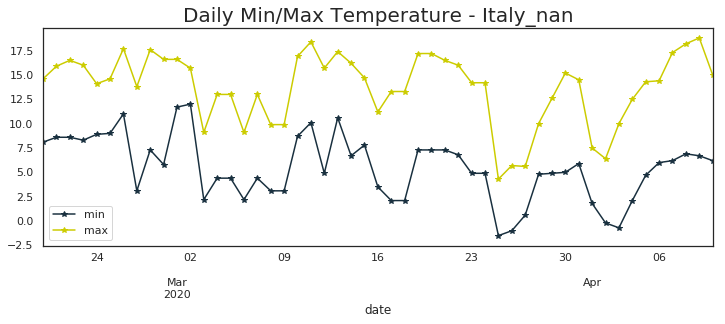

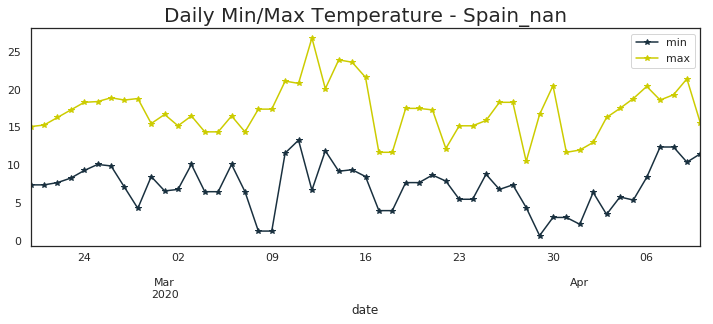

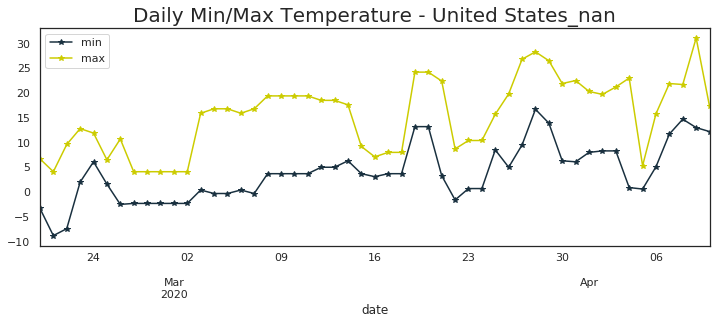

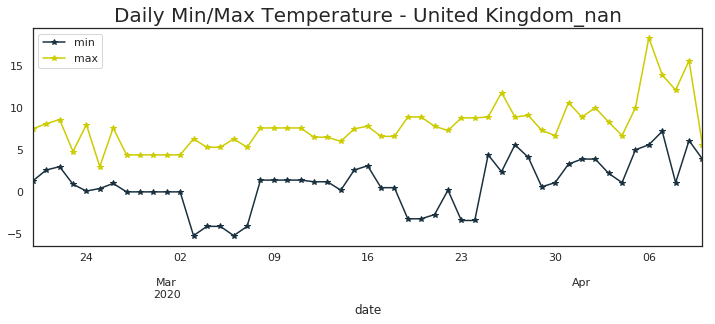

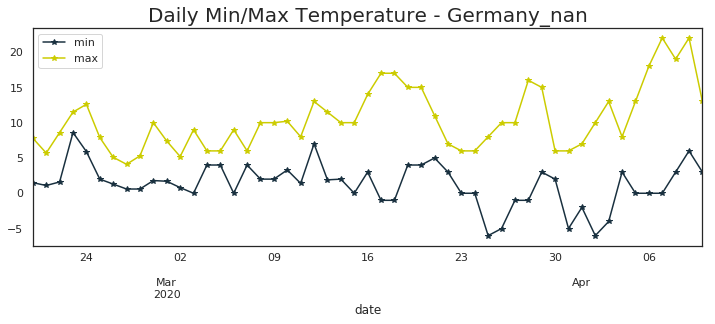

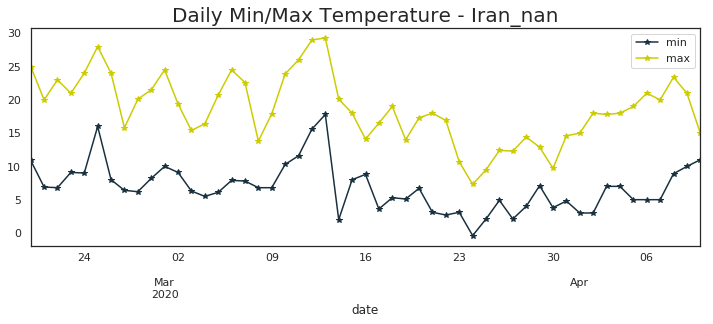

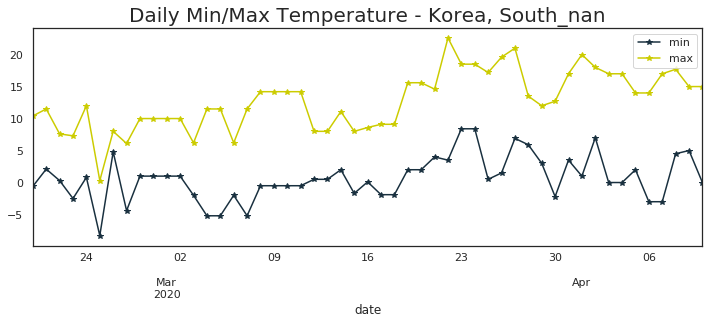

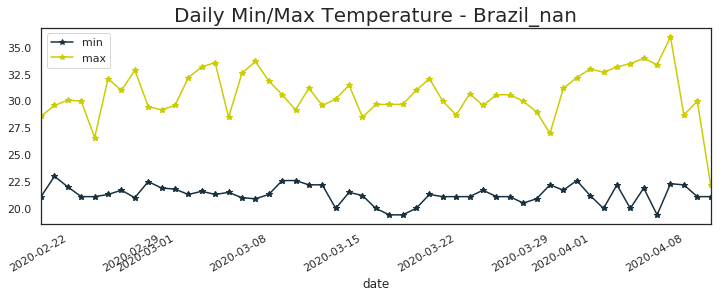

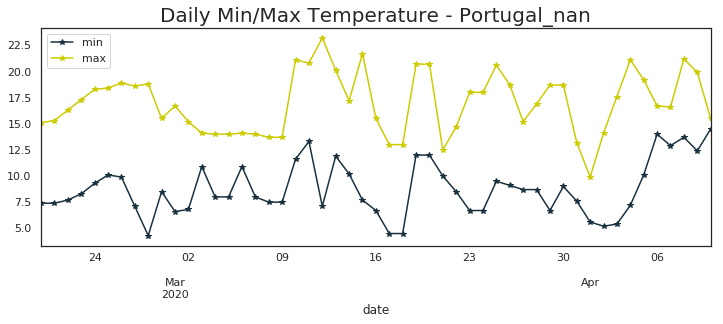

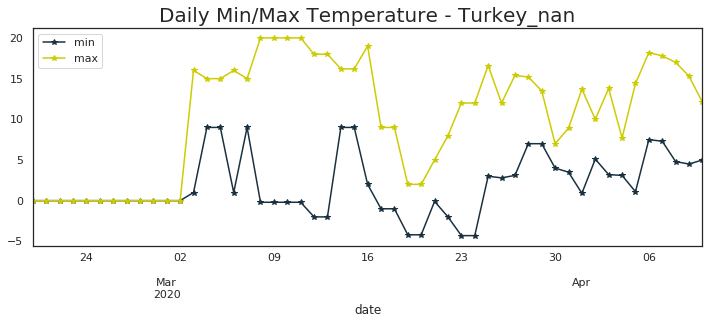

In [59]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['China_Hubei','Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan','Korea, South_nan','Brazil_nan','Portugal_nan','Turkey_nan']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [60]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.0  18.8
Germany_nan                  8.6  22.0
France_nan                   9.9  22.2
China_Hubei                 18.6  27.0
Iran_nan                    17.8  29.3
United Kingdom_nan           7.2  18.3
Turkey_nan                   9.0  20.0
Belgium_nan                 11.5  26.1
Switzerland_nan              8.9  17.5
Netherlands_nan             12.8  26.1
Brazil_nan                  23.0  36.0
Portugal_nan                14.5  23.2
Austria_nan                  2.6  11.7
Canada_Quebec                0.0   0.0
Korea, South_nan             8.4  22.6
Russia_nan                   1.3  20.0
Israel_nan                  12.9  24.7
Sweden_nan                   2.7  12.8
India_nan                   25.0  39.2
Ireland_nan                  0.0   0.0
Norway_nan                  

### Kalman X Days Ahead Prediction

In [61]:
%%R

#install.packages('reshape')

NULL


In [62]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:25) { # Set i days prediction    ### 25 days forward prediction with Kalman Filter
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [63]:
all_new=%R all_new

In [64]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

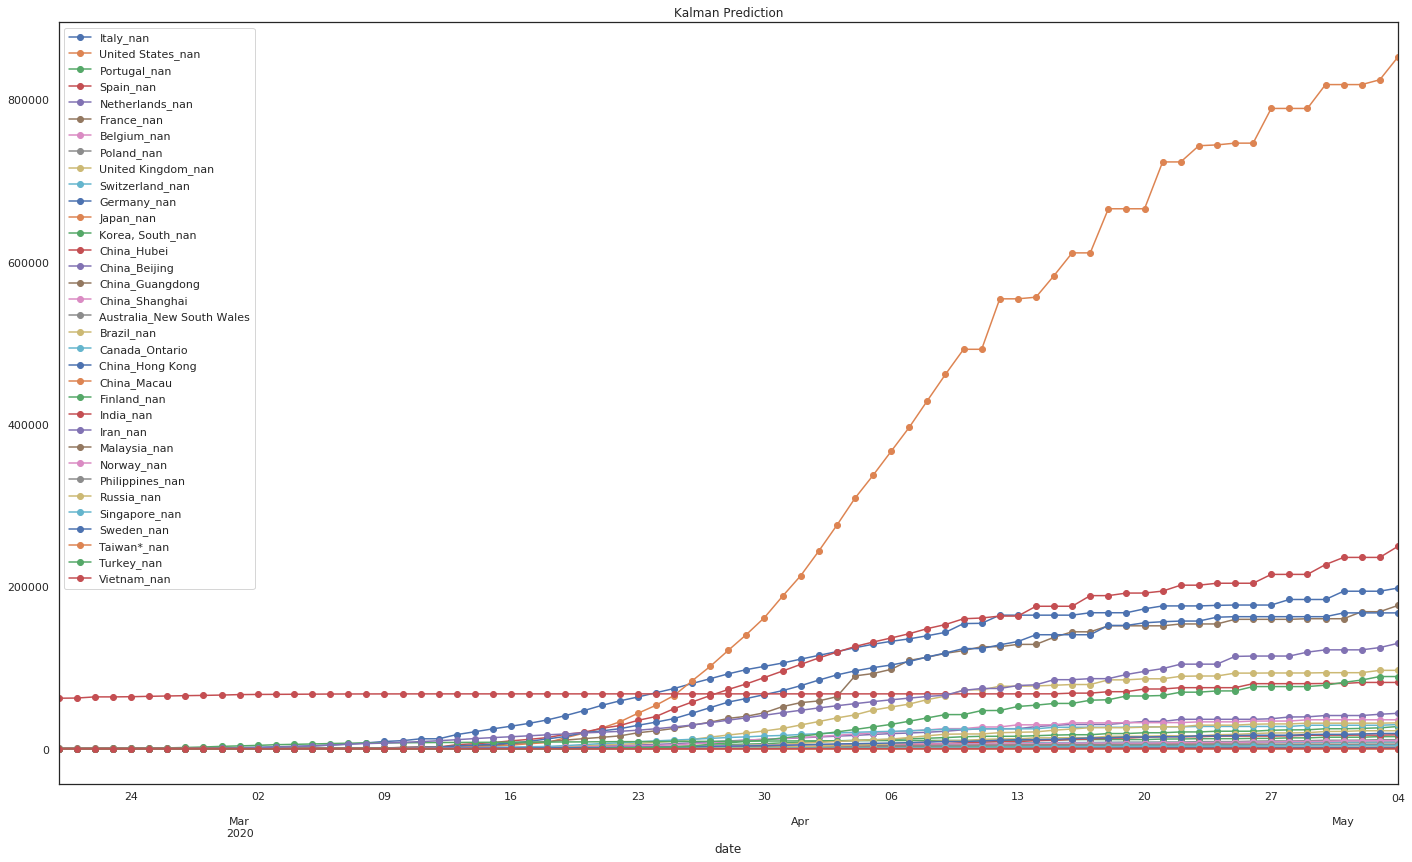

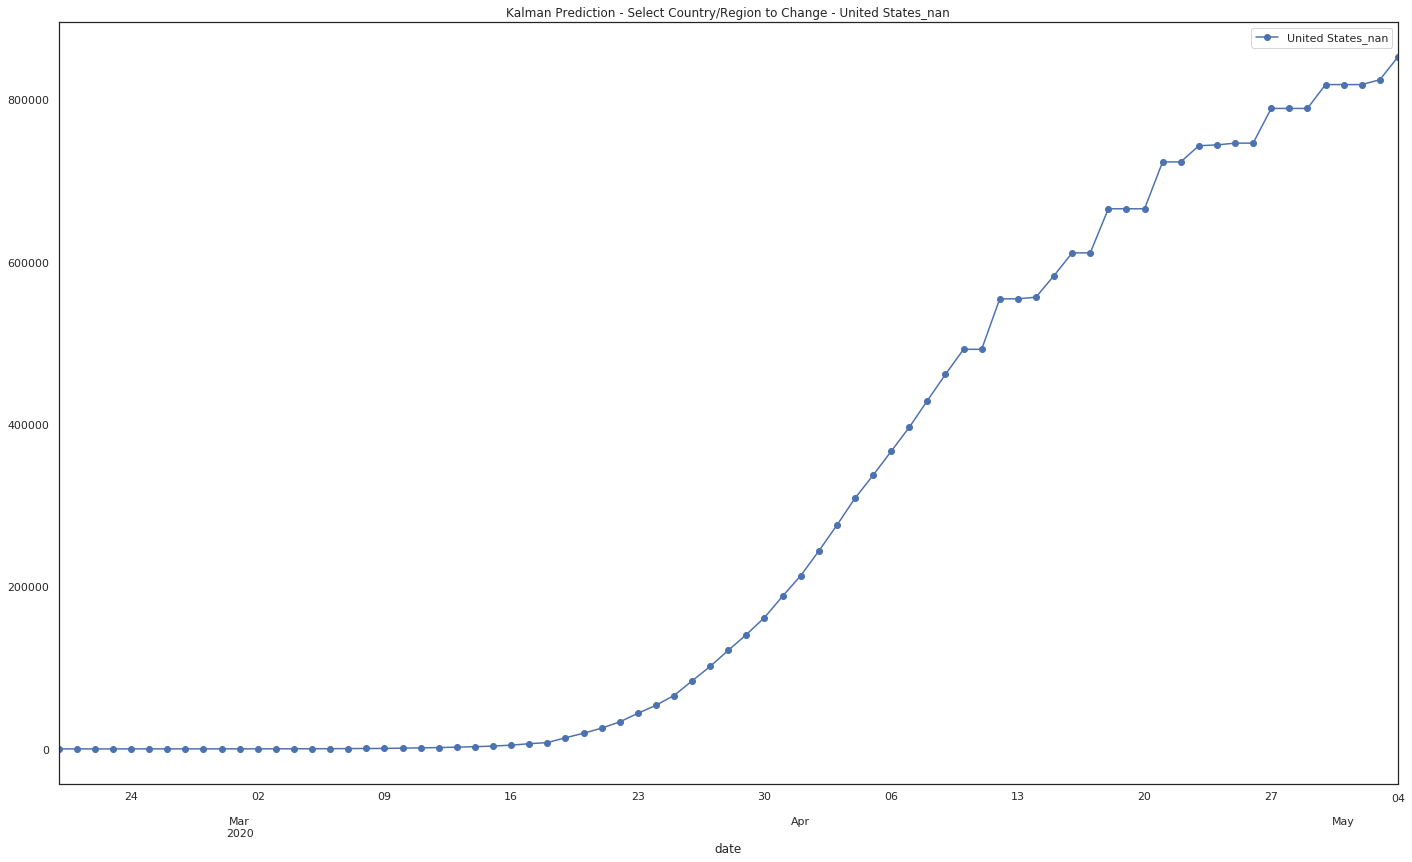

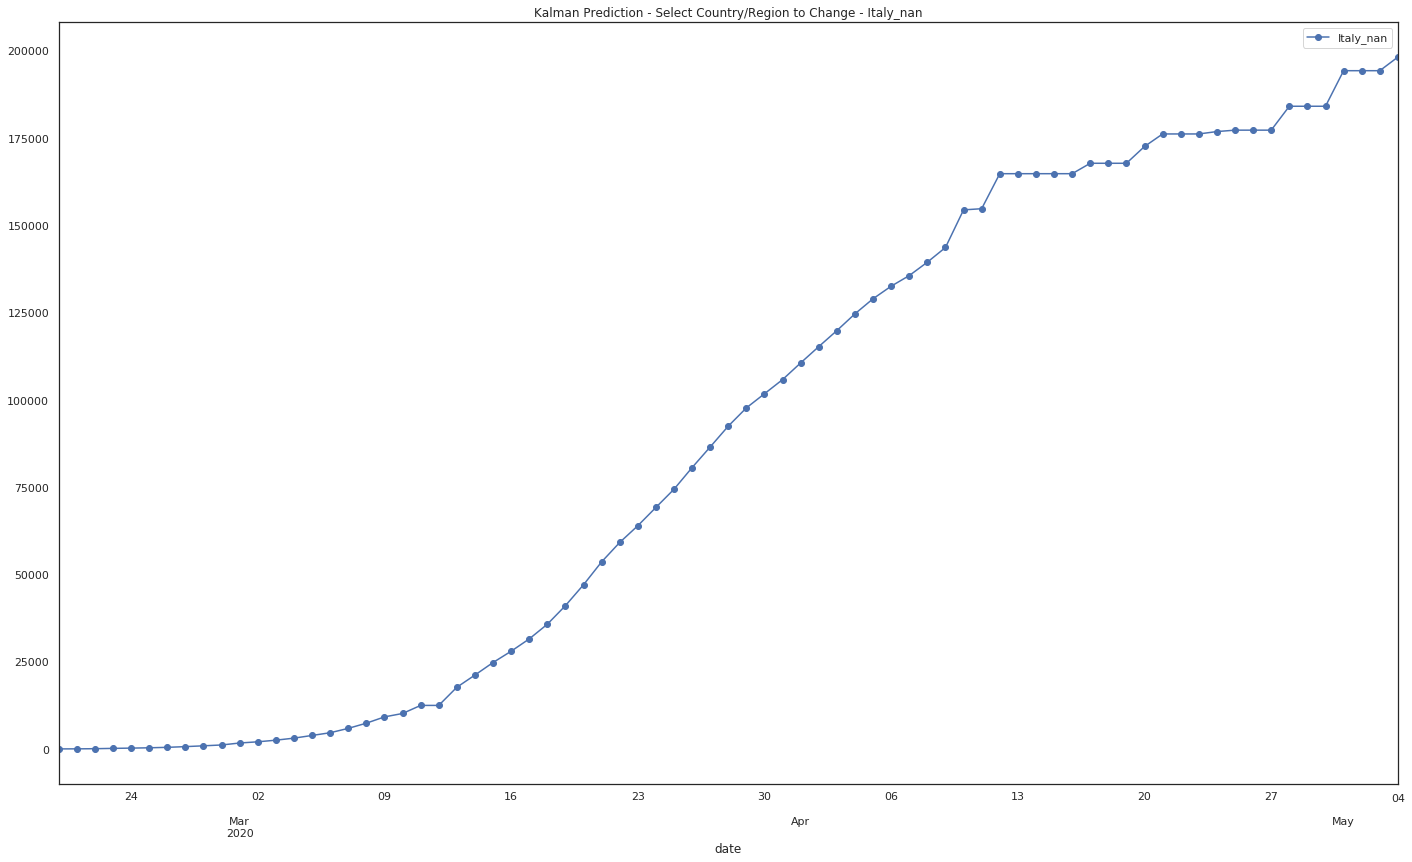

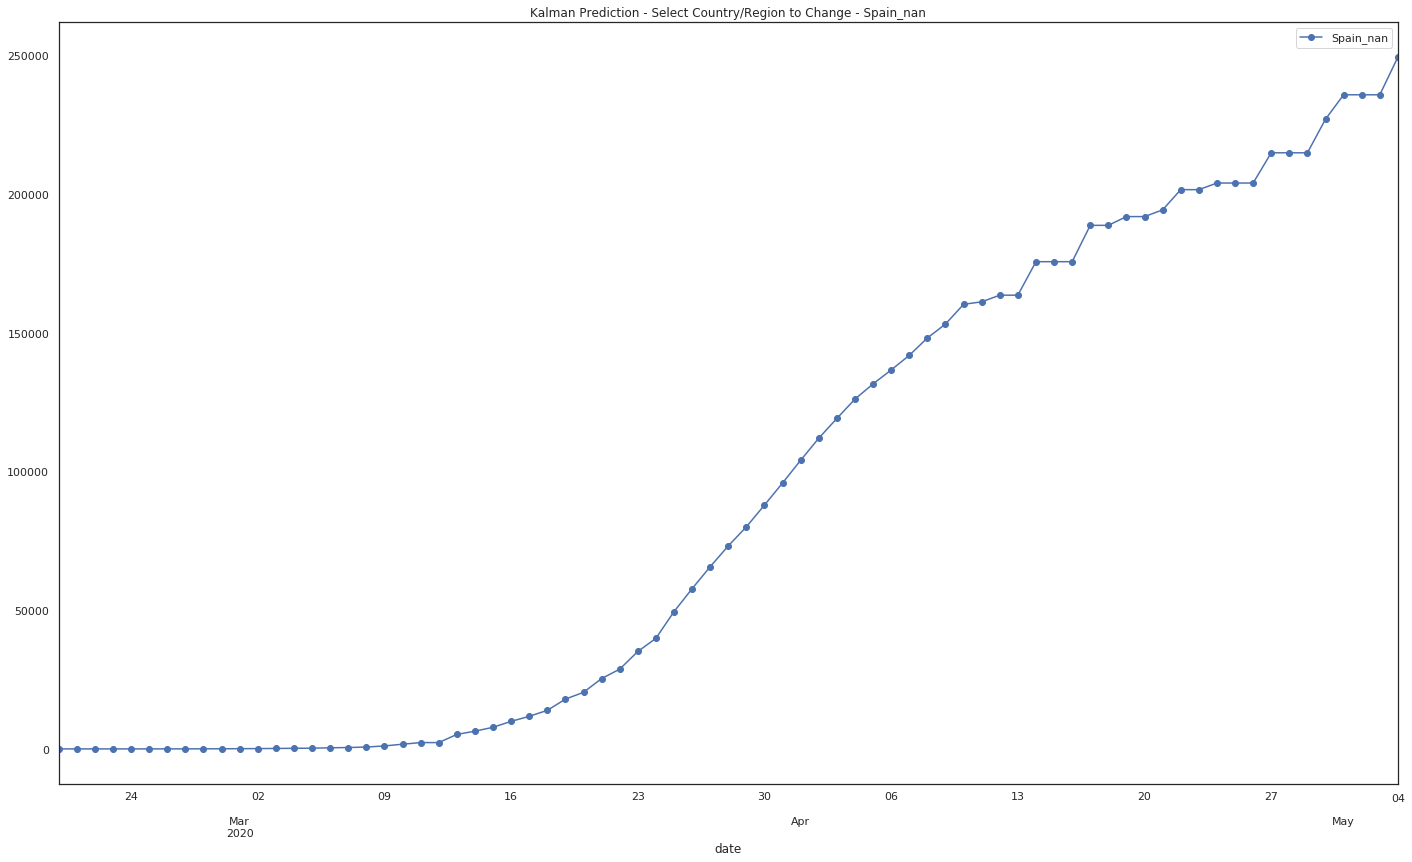

In [65]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


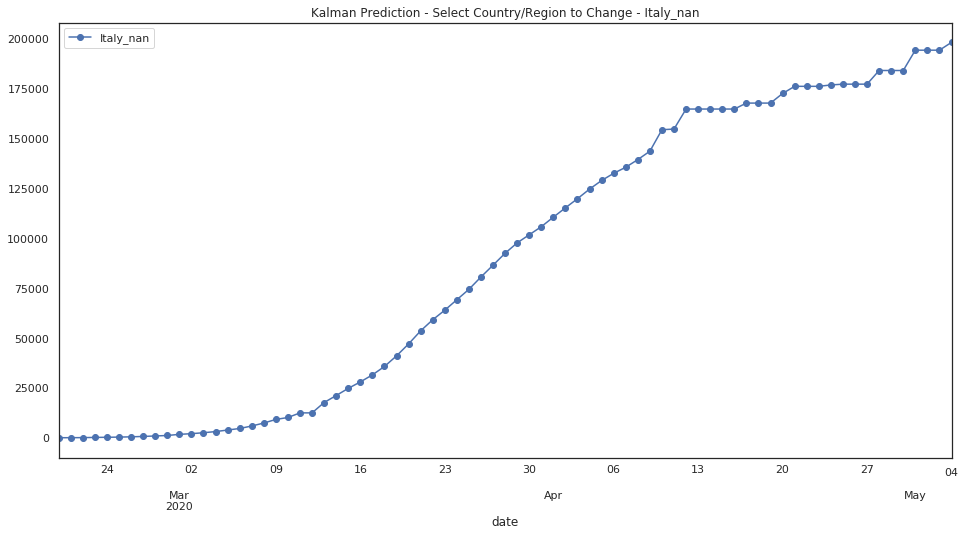

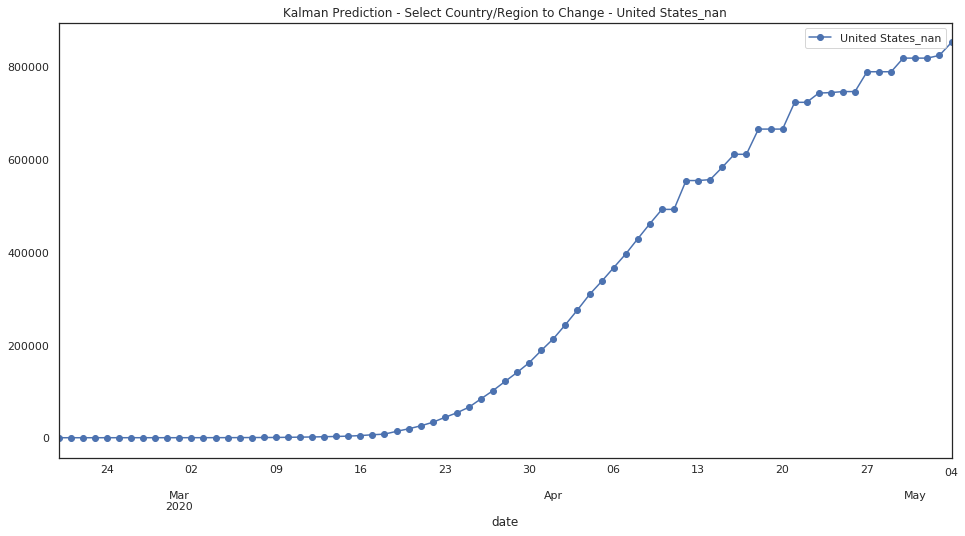

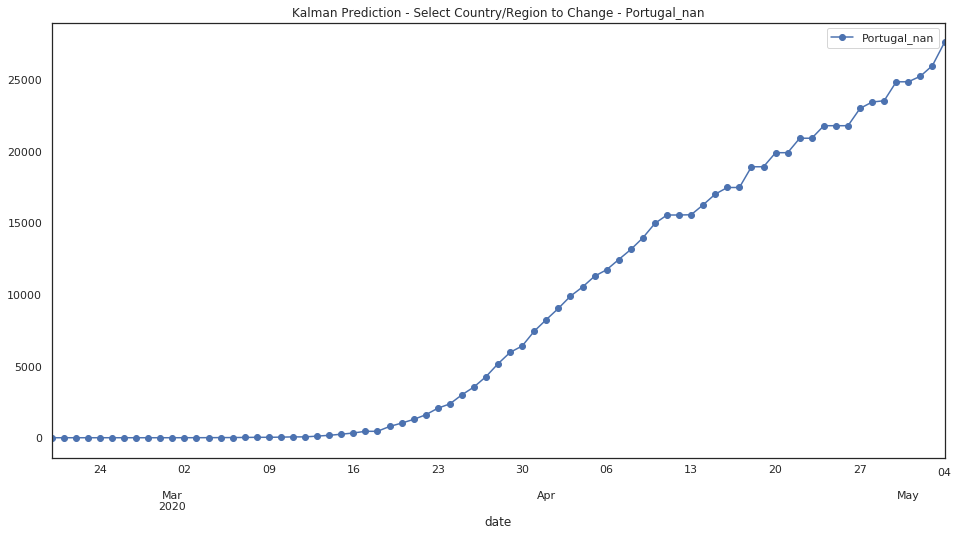

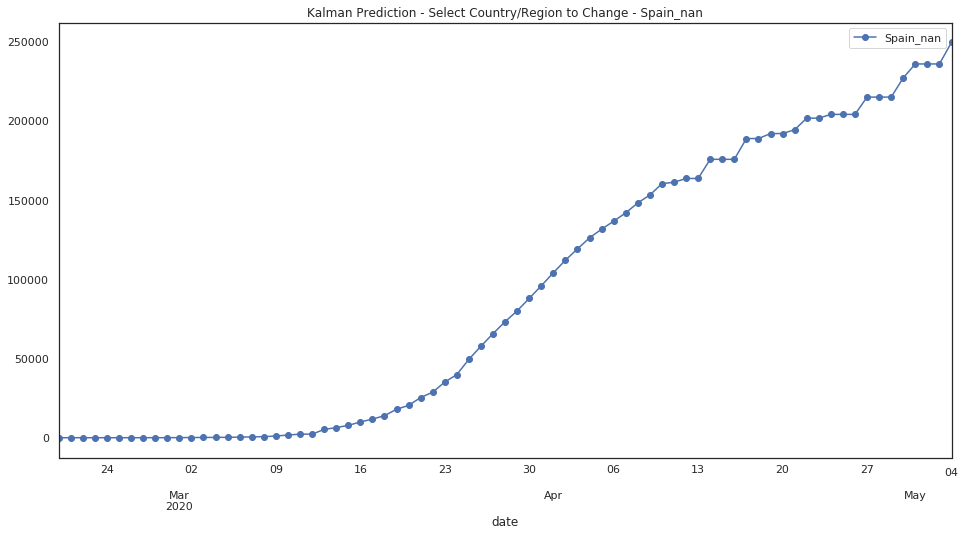

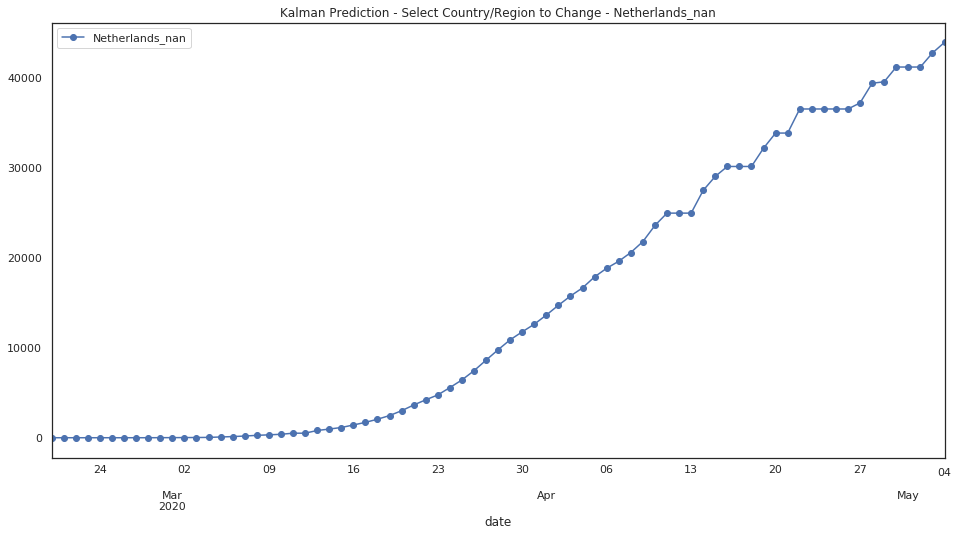

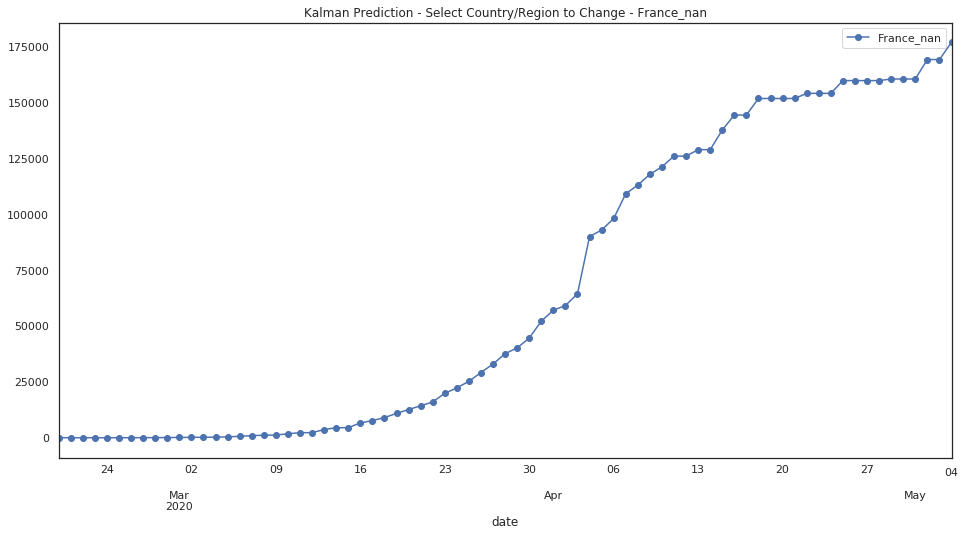

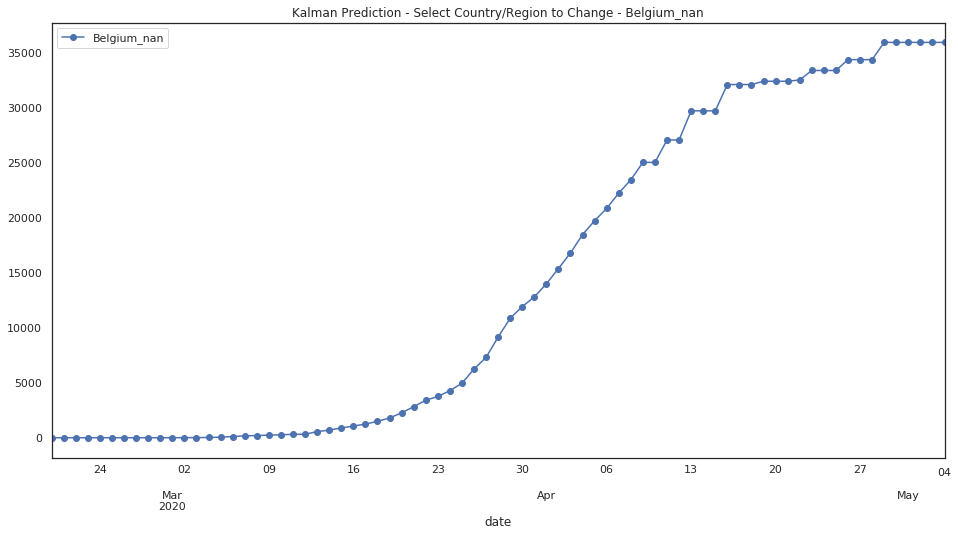

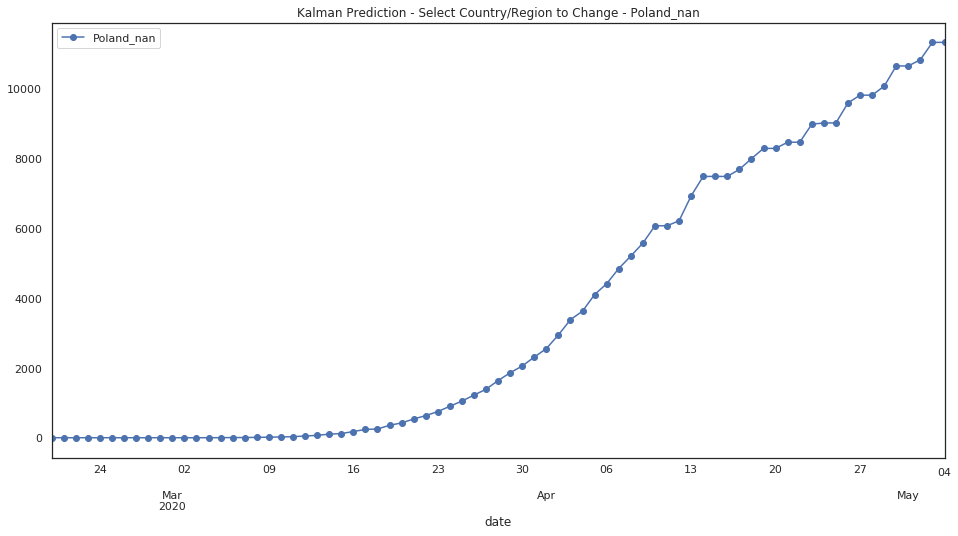

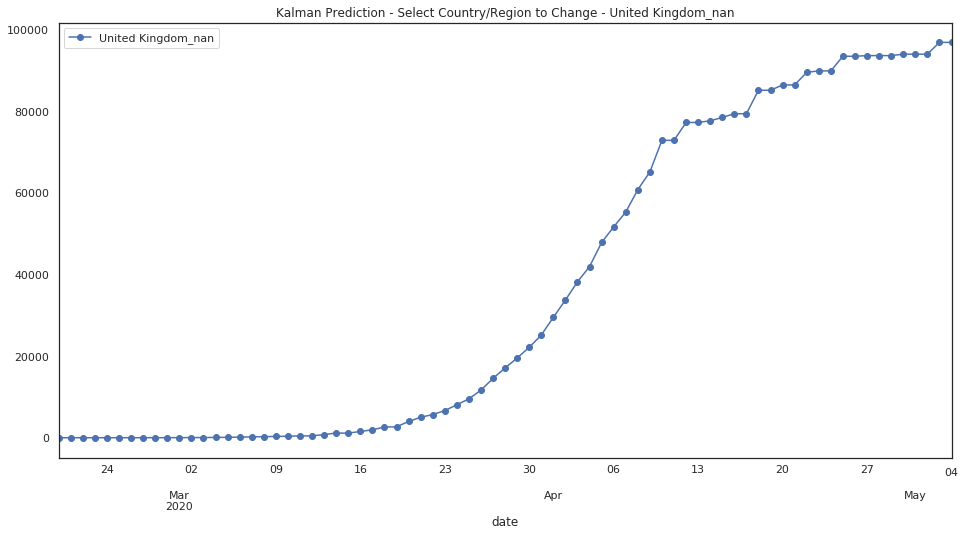

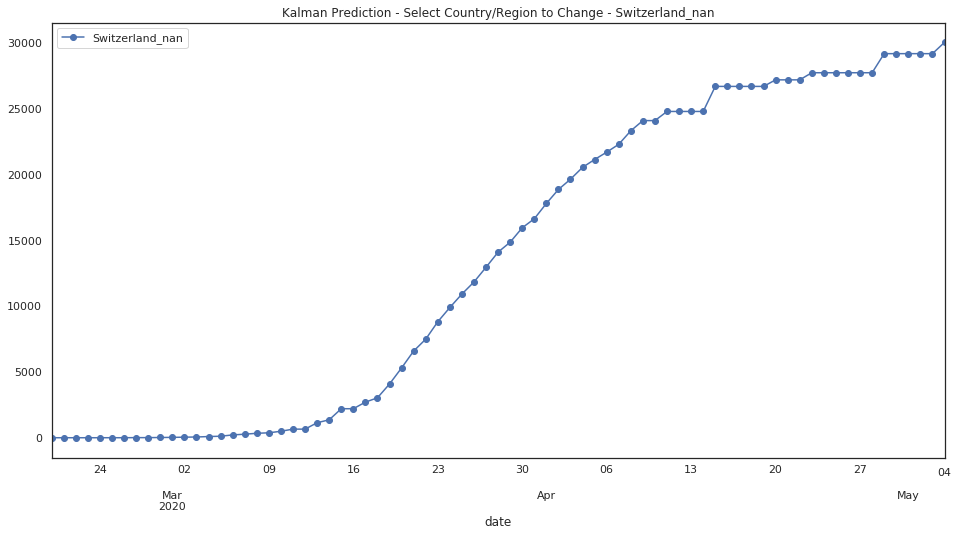

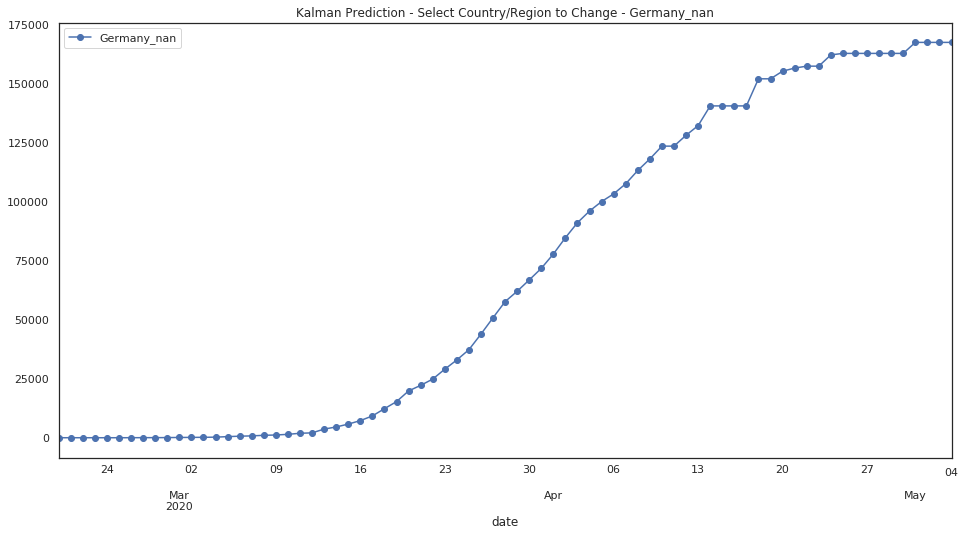

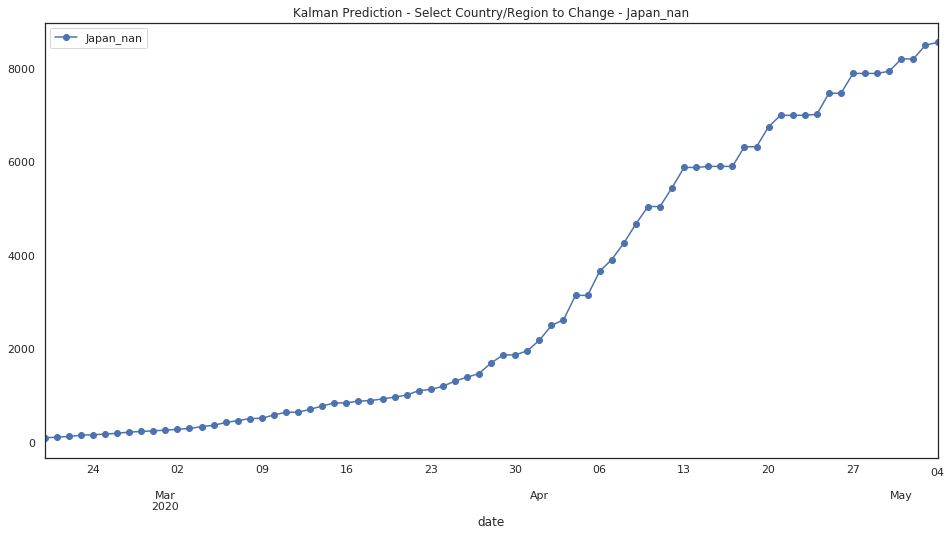

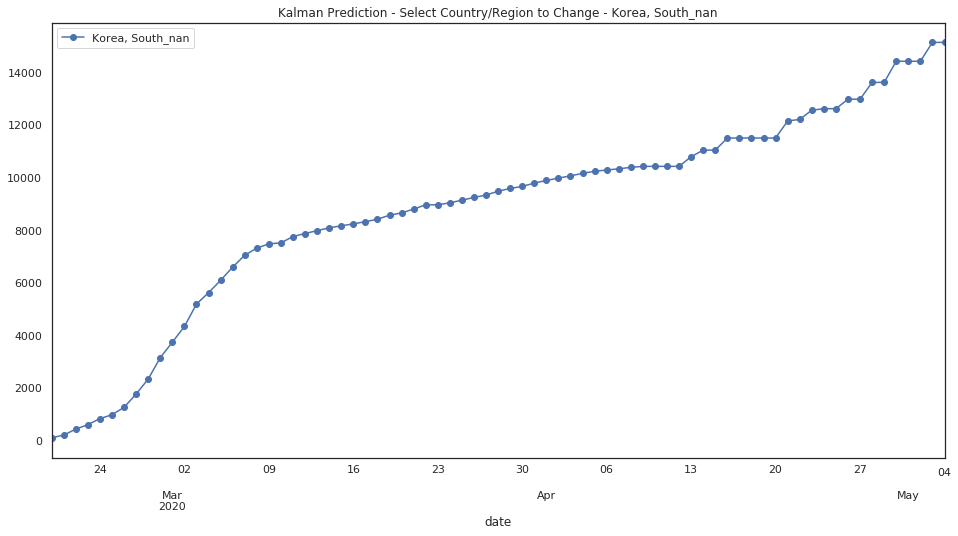

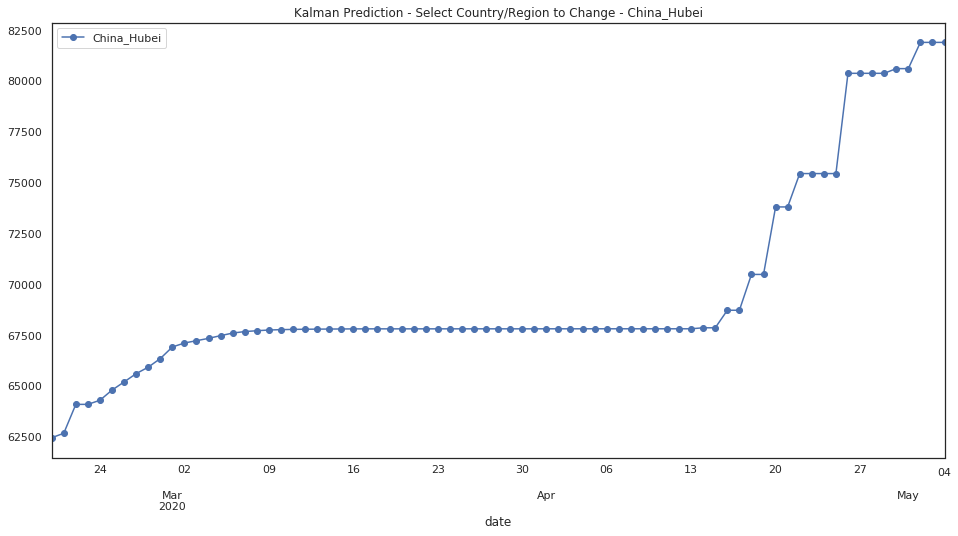

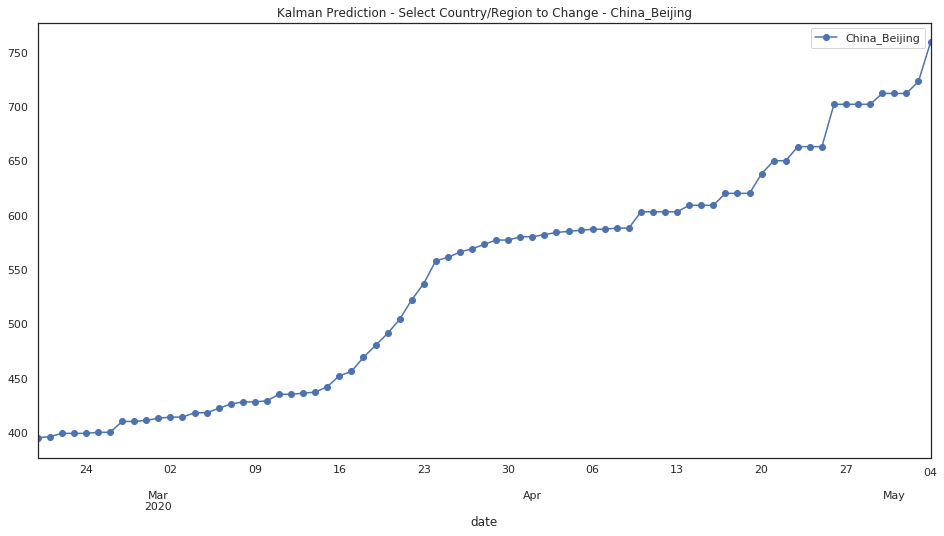

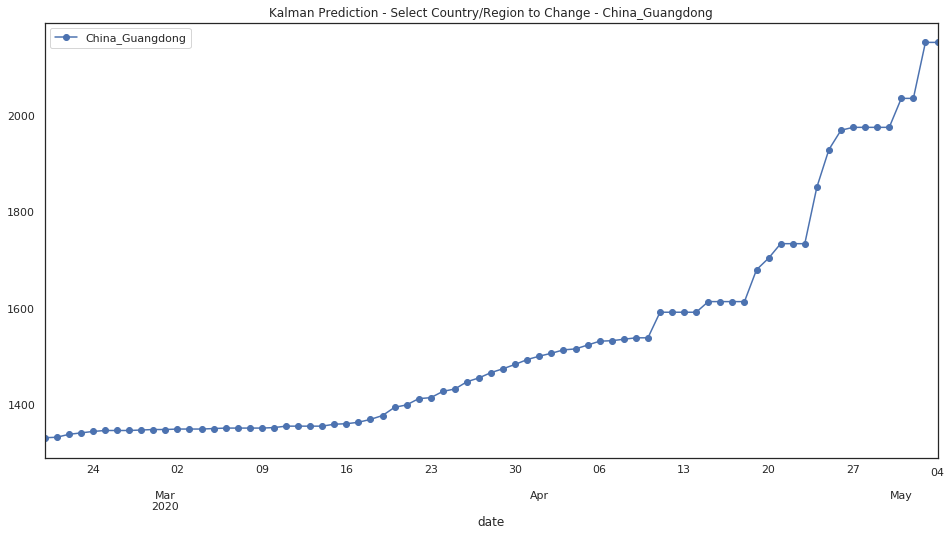

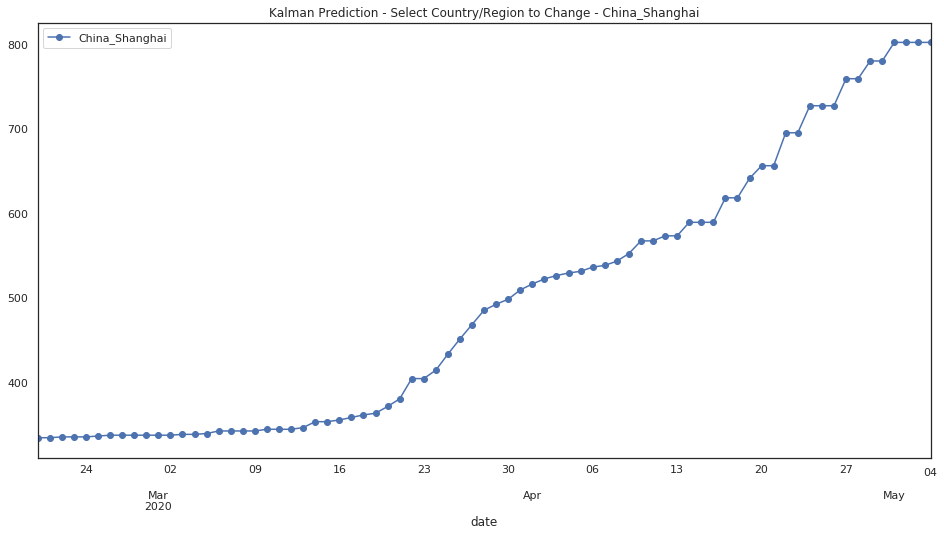

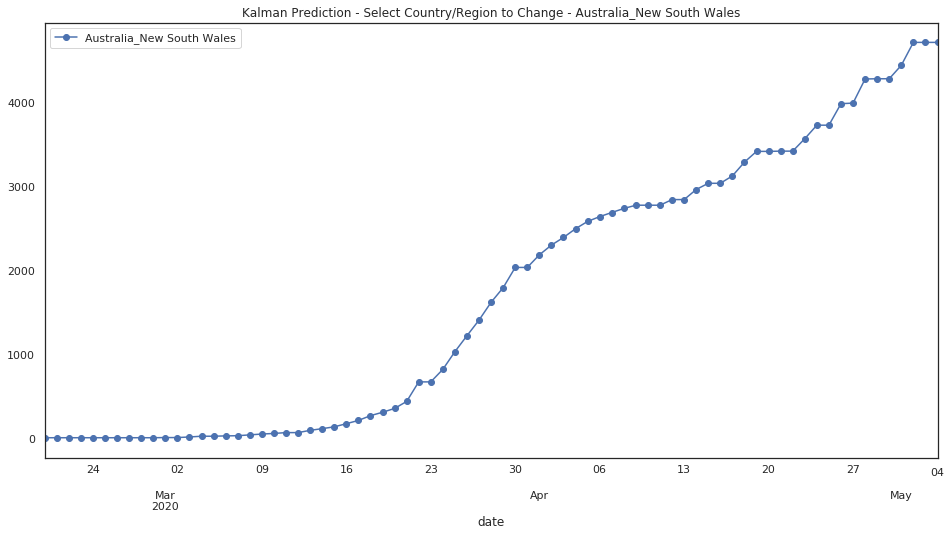

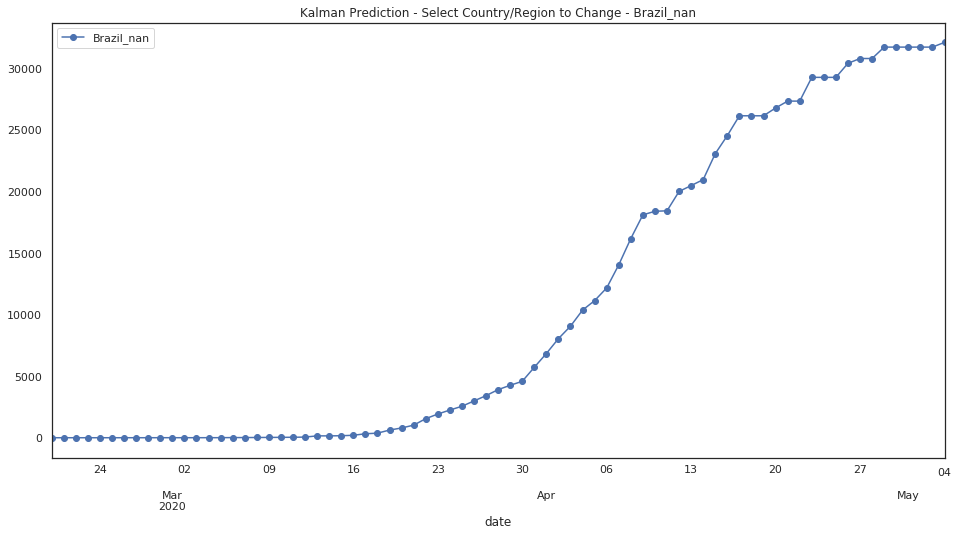

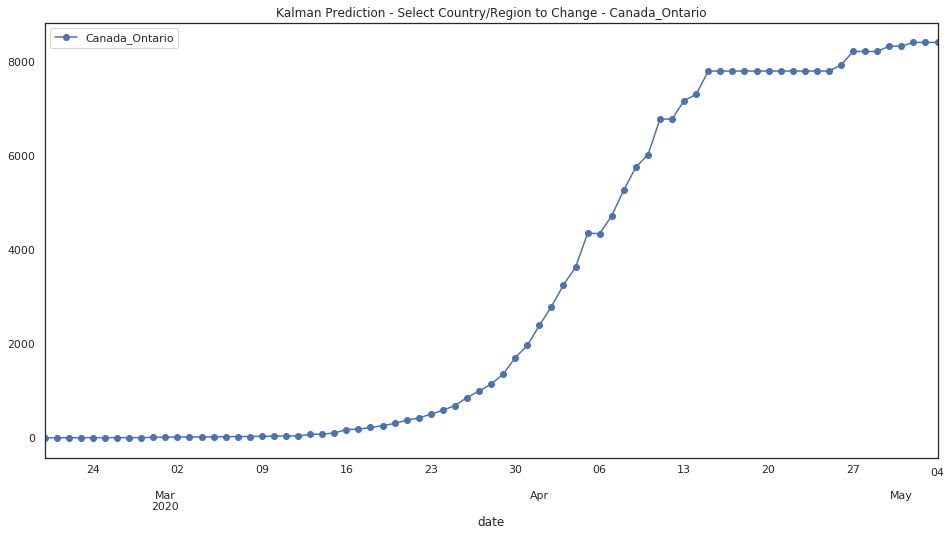

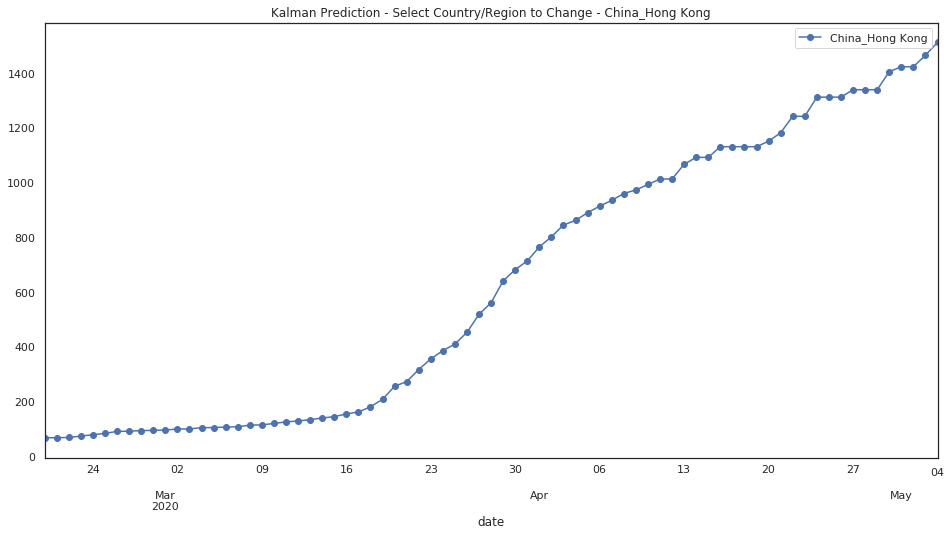

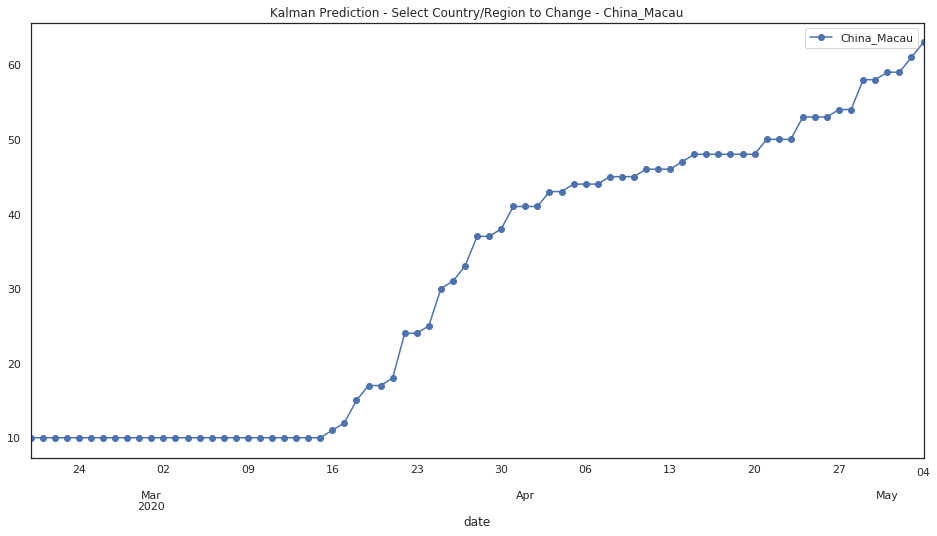

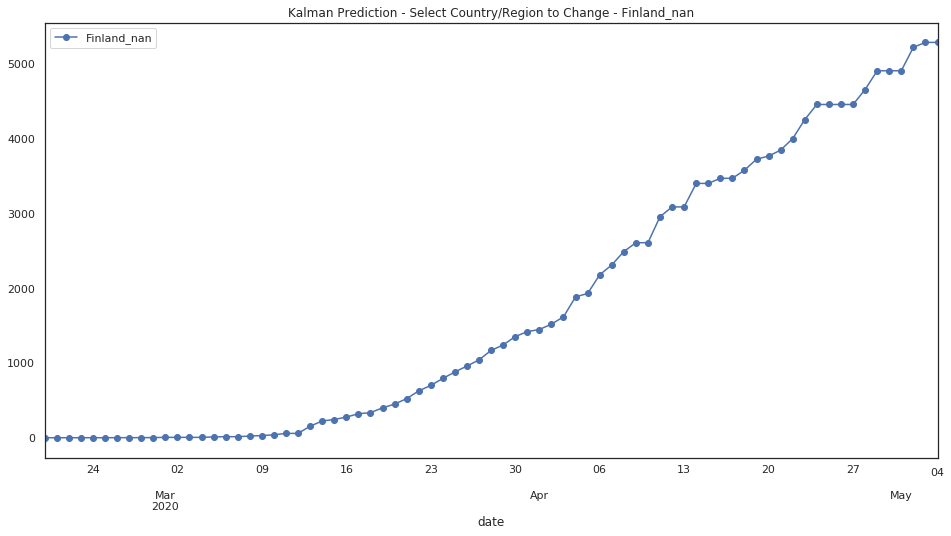

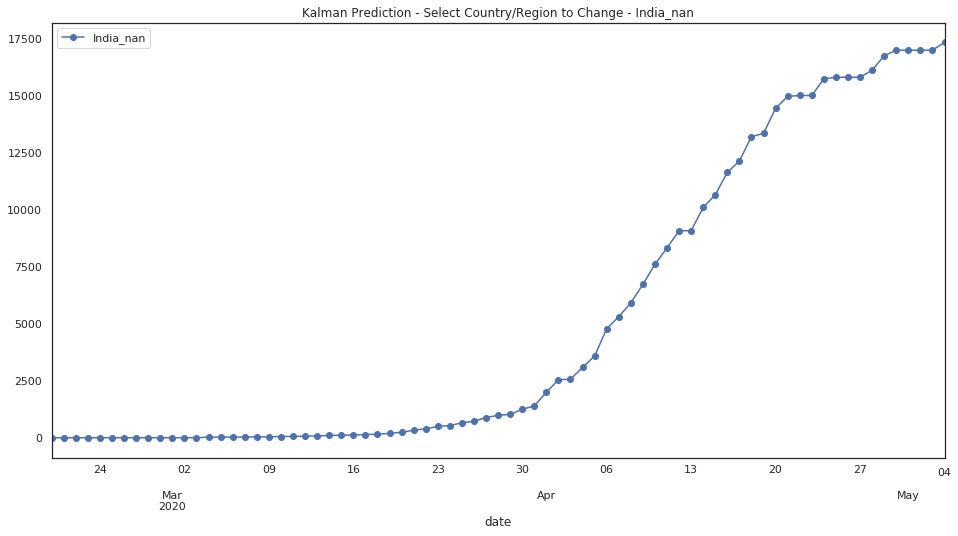

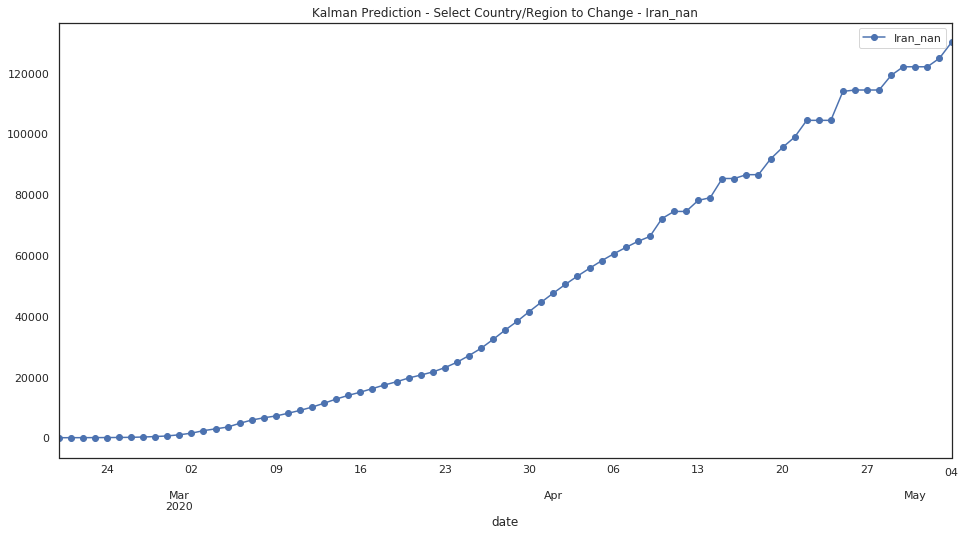

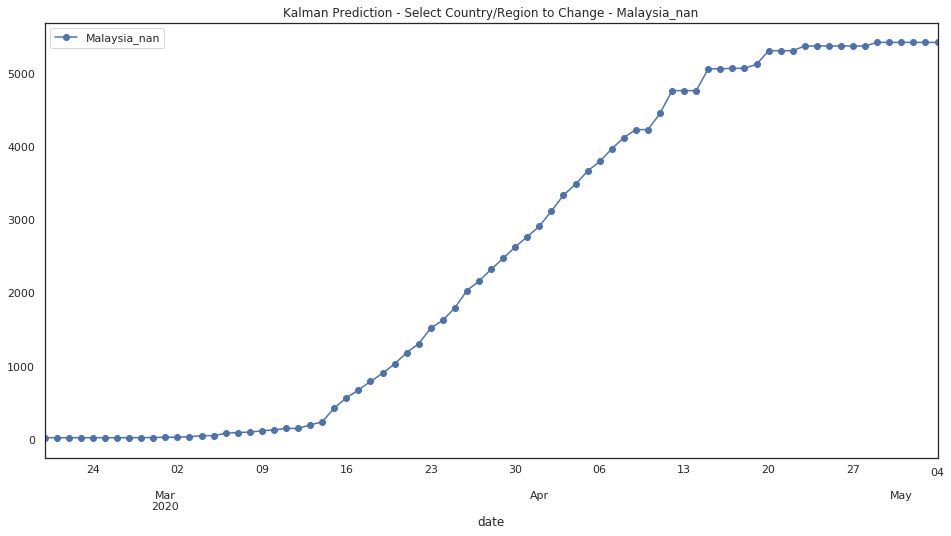

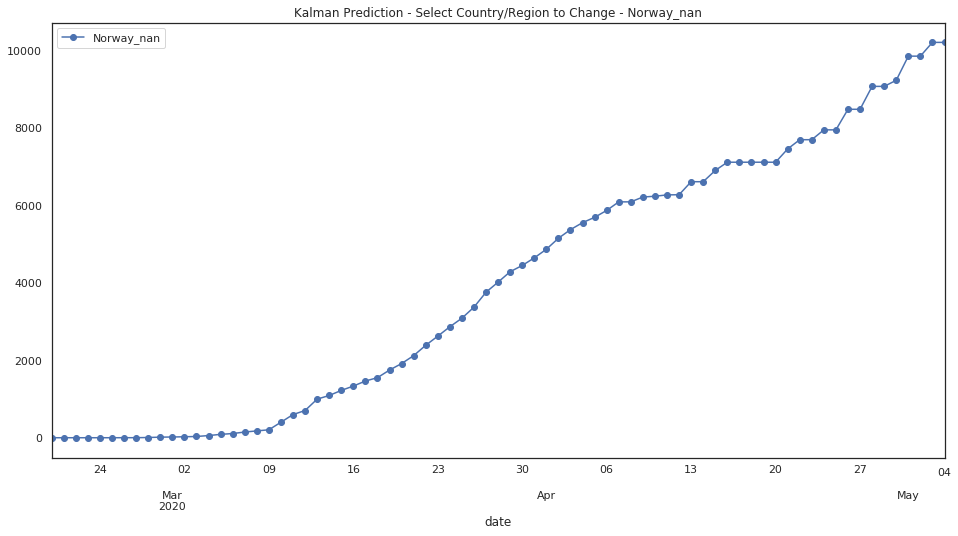

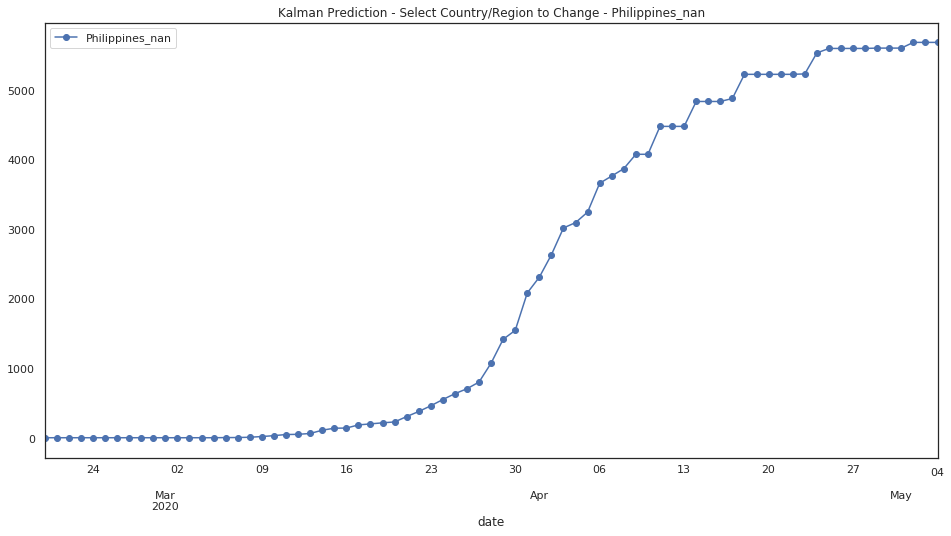

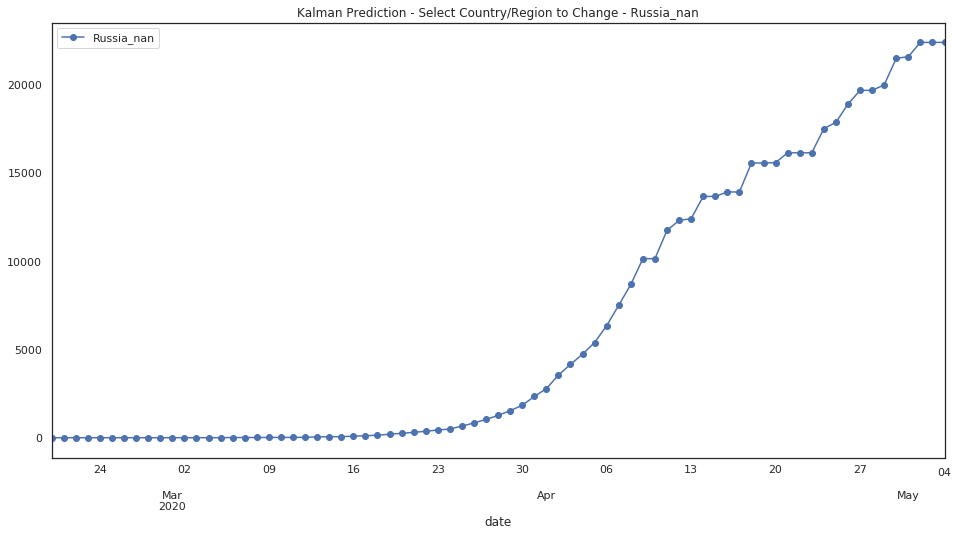

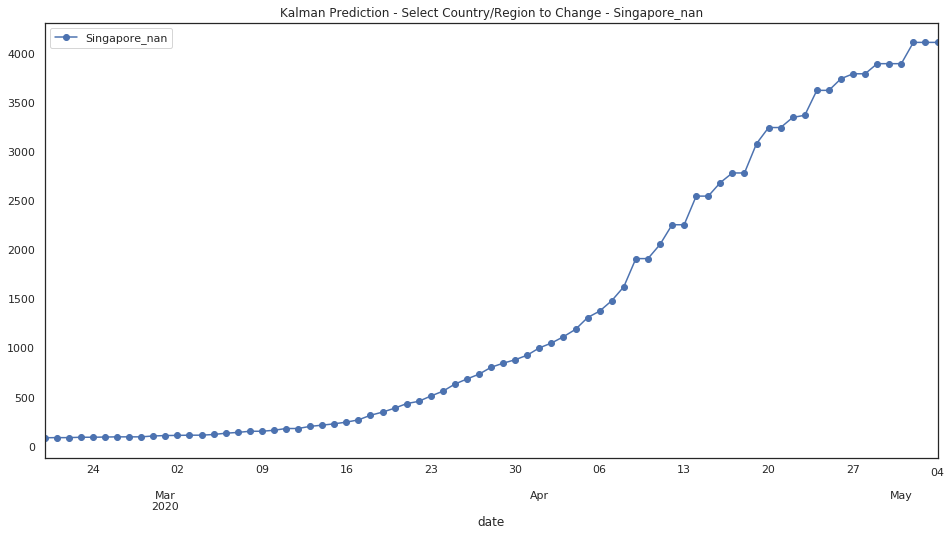

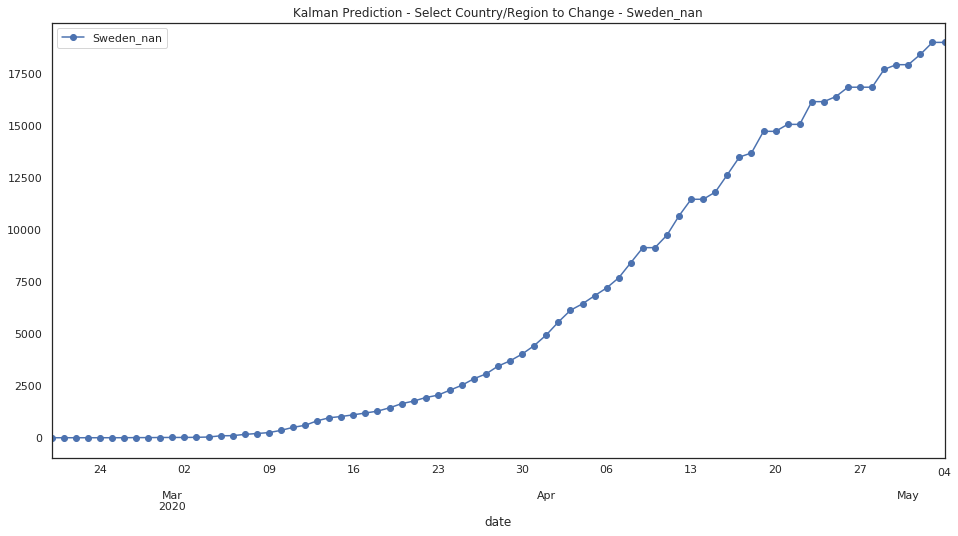

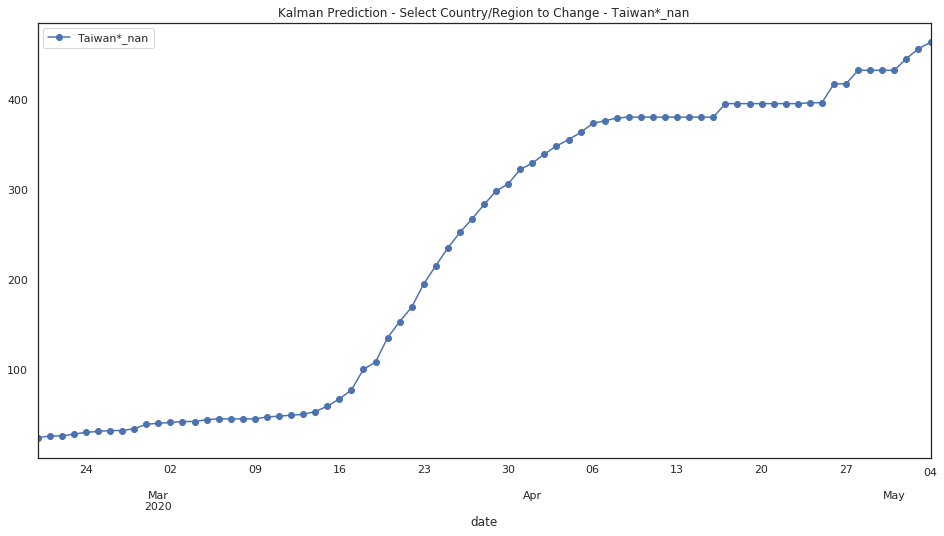

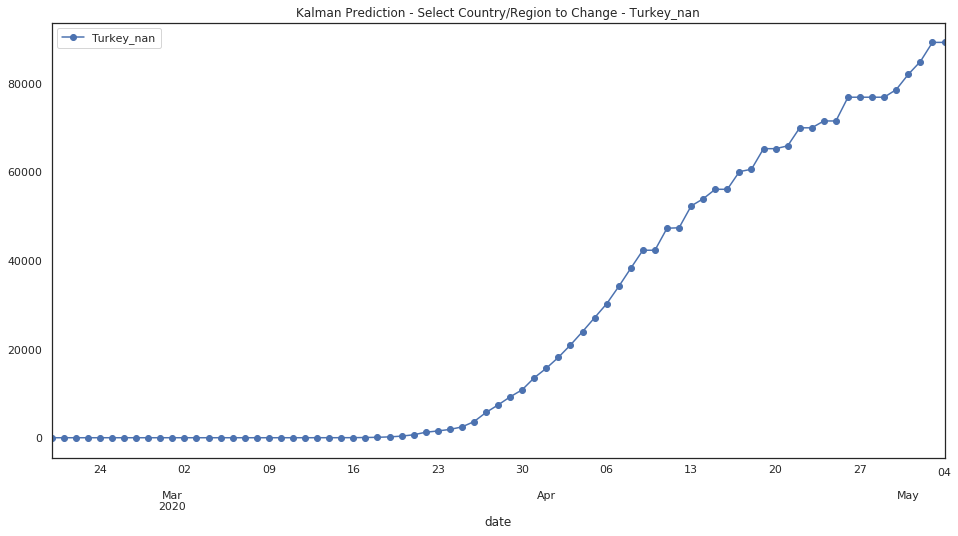

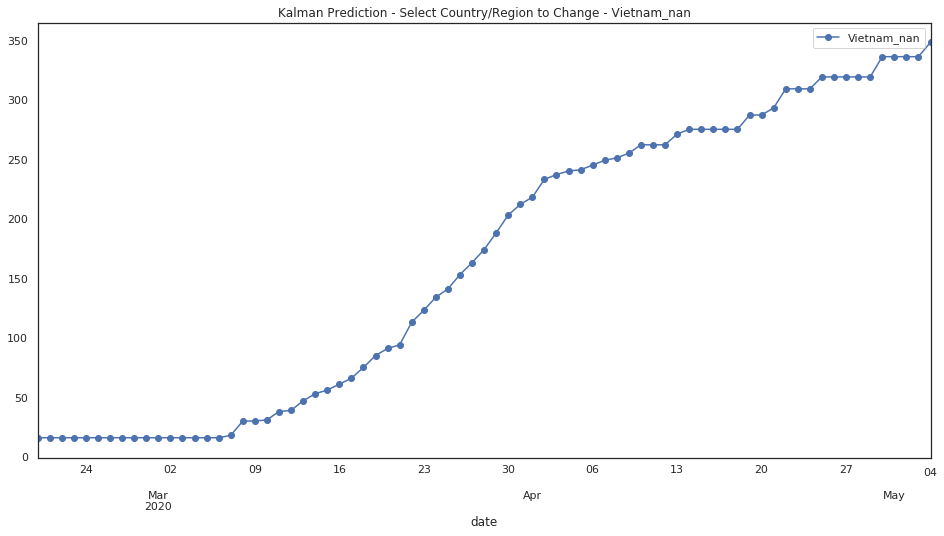

In [66]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [67]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-05-04 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             852331.0        852331.0
Spain_nan                                     249531.0        249531.0
Italy_nan                                     198176.0        198176.0
France_nan                                    176716.0        176716.0
Germany_nan                                   167567.0        167567.0
Iran_nan                                      130062.0        130062.0
United Kingdom_nan                             96776.0         96776.0
Turkey_nan                                     89153.0         89153.0
China_Hubei                                    81896.0         81896.0
Netherlands_nan                                43860.0         43860.0
Belgium_nan                                    35872.0         35872.0
Brazil_nan                                     32094.0         32094.0
Switzerland_nan                                29983.0         29983.0
Portugal_nan                                   27600.0         27600.0
Russia_nan                                     22367.0         22367.0
Canada_Quebec                                  21987.0         21987.0
Peru_nan                                       19211.0         19211.0
Sweden_nan                                     19012.0         19012.0
Austria_nan                                    17978.0         17978.0
India_nan                                      17334.0         17334.0
Israel_nan                                     16033.0         16033.0
Korea, South_nan                               15137.0         15137.0
Ecuador_nan                                    13662.0         13662.0
Chile_nan                                      13475.0         13475.0
Ireland_nan                                    12293.0         12293.0
Poland_nan                                     11326.0         11326.0
Denmark_nan                                    10812.0         10812.0
Norway_nan                                     10201.0         10201.0
Czechia_nan                                    10121.0         10121.0
Romania_nan                                     9459.0          9459.0
...                                                ...             ...
United Kingdom_Turks and Caicos Islands           15.0            15.0
Seychelles_nan                                    13.0            13.0
Holy See_nan                                      13.0            13.0
Chad_nan                                          13.0            13.0
Grenada_nan                                       12.0            12.0
Sierra Leone_nan                                  12.0            12.0
Saint Kitts and Nevis_nan                         12.0            12.0
Western Sahara_nan                                11.0            11.0
Nicaragua_nan                                     10.0            10.0
MS Zaandam_nan                                    10.0            10.0
Suriname_nan                                      10.0            10.0
Nepal_nan                                         10.0            10.0
Cabo Verde_nan                                     8.0             8.0
Mauritania_nan                                     8.0             8.0
Canada_Northwest Territories                       8.0             8.0
Canada_Yukon                                       7.0             7.0
South Sudan_nan                                    6.0             6.0
France_Saint Barthelemy                            6.0             6.0
Bhutan_nan                                         5.0             5.0
Gambia_nan                                         4.0             4.0
United Kingdom_British Virgin Islands              3.0             3.0
United Kingdom_Anguilla                            3.0             3.0
Burundi_nan                                        3.0             3.0
Papua New Guinea_nan                               2.0             2.0
Netherlands_Bonaire, Sint Eustatius and Saba       2.0             2.0
France

In [68]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [69]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [70]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [71]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [72]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [73]:
pred[47:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-07            367.0        377.0       1423.0        525.0   
2020-04-08            423.0        383.0       1468.0        545.0   
2020-04-09            444.0        400.0       1572.0        564.0   
2020-04-10            484.0        409.0       1666.0        583.0   
2020-04-11            484.0        409.0       1727.0        604.0   
2020-04-12            556.0        415.0       1808.0        604.0   
2020-04-13            557.0        415.0       1893.0        634.0   
2020-04-14            557.0        415.0       1893.0        644.0   
2020-04-15            627.0        415.0       1893.0        677.0   
2020-04-16            654.0        421.0       2069.0        691.0   
2020-04-17            669.0        436.0       2069.0        694.0   
2020-04-18            722.0        436.0       2069.0        719.0   
2020-04-19            736.0        436.0       2216.0        720.0   
2020-04-20            736.0        436.0       2216.0        720.0   
2020-04-21            818.0        440.0       2216.0        769.0   
2020-04-22            818.0        440.0       2216.0        769.0   
2020-04-23            891.0        440.0       2383.0        769.0   
2020-04-24            907.0        442.0       2383.0        769.0   
2020-04-25            962.0        442.0       2470.0        820.0   
2020-04-26            962.0        461.0       2470.0        820.0   
2020-04-27            998.0        475.0       2536.0        822.0   
2020-04-28            998.0        475.0       2536.0        867.0   
2020-04-29            998.0        475.0       2536.0        884.0   
2020-04-30           1071.0        475.0       2536.0        939.0   
2020-05-01           1105.0        486.0       2536.0        939.0   
2020-05-02           1127.0        487.0       2688.0        939.0   
2020-05-03           1127.0        487.0       2688.0        947.0   
2020-05-04           1127.0        487.0       2778.0        993.0   
2020-05-05           1217.0        487.0       2791.0       1034.0   

region      Angola_nan  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
date                                                                          
2020-04-07        16.0                     15.0         1554.0        833.0   
2020-04-08        17.0                     19.0         1628.0        853.0   
2020-04-09        19.0                     19.0         1715.0        881.0   
2020-04-10        19.0                     19.0         1795.0        921.0   
2020-04-11        20.0                     19.0         1795.0        967.0   
2020-04-12        22.0                     19.0         1869.0        996.0   
2020-04-13        24.0                     20.0         1945.0        996.0   
2020-04-14        24.0                     20.0         1962.0       1030.0   
2020-04-15        24.0                     21.0         1962.0       1076.0   
2020-04-16        24.0                     22.0         1976.0       1120.0   
2020-04-17        24.0                     22.0         1976.0       1120.0   
2020-04-18        25.0                     22.0         1976.0       1120.0   
2020-04-19        25.0                     23.0         1976.0       1135.0   
2020-04-20        25.0                     23.0         2069.0       1135.0   
2020-04-21        26.0                     24.0         2069.0       1207.0   
2020-04-22        26.0                     24.0         2069.0       1223.0   
2020-04-23        26.0                     24.0         2069.0       1247.0   
2020-04-24        26.0                     25.0         2069.0       1247.0   
2020-04-25        27.0                     25.0         2069.0       1247.0   
2020-04-26        27.0                     26.0         2127.0       1247.0   
2020-04-27        27.0                     27.0         2127.0       1247.0   
2020-04-28  

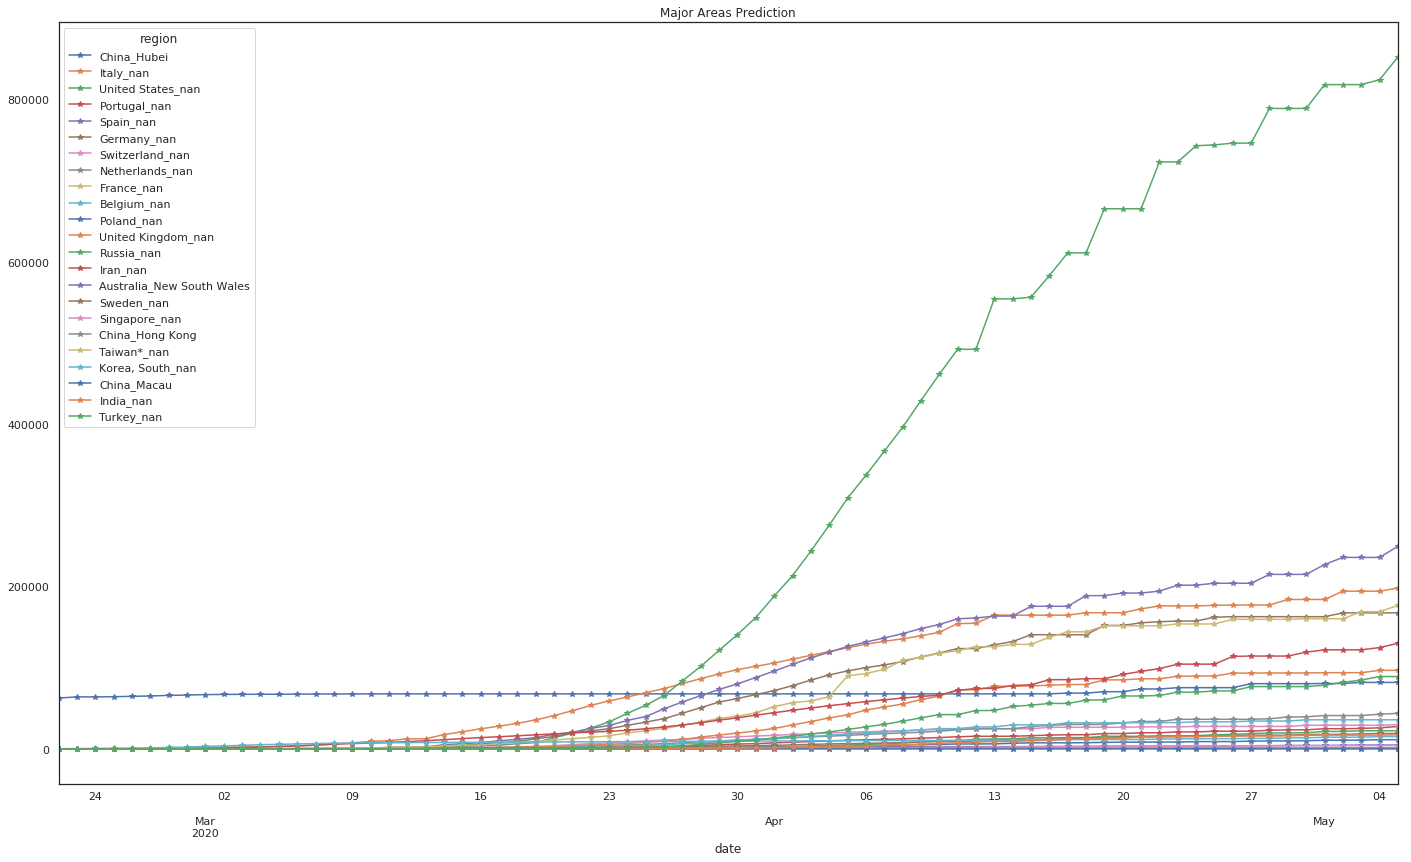

In [74]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'Iran_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
        'Turkey_nan'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

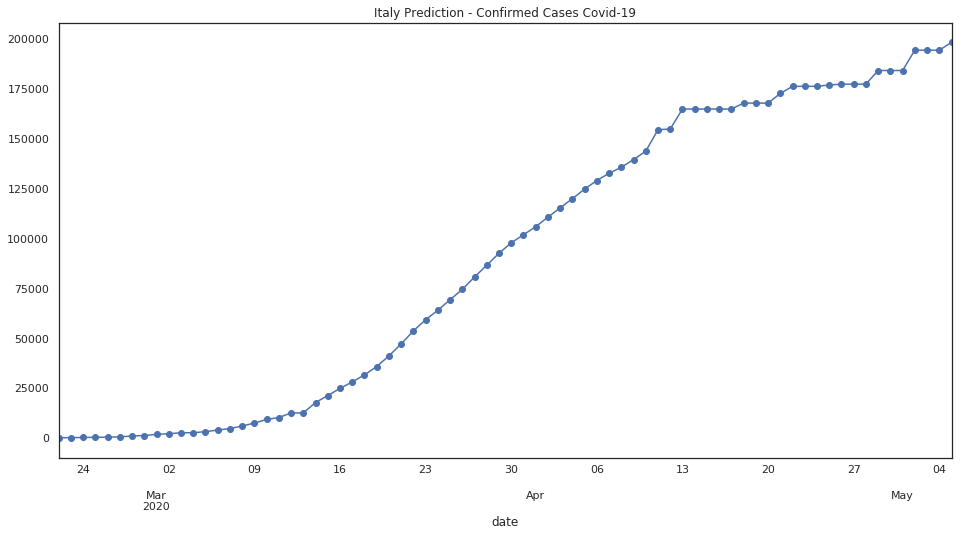

In [75]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2[2:].plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

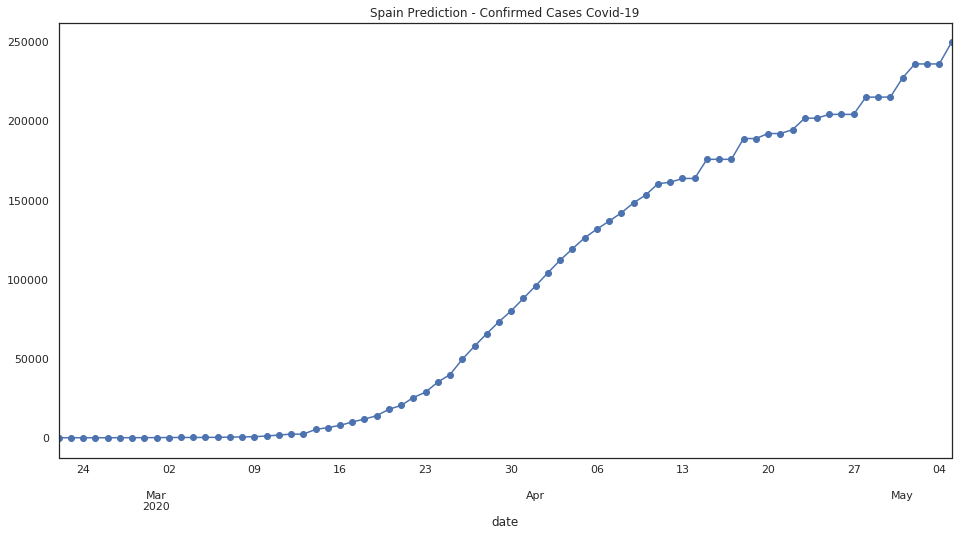

In [76]:
p3=pred['Spain_nan']
p3[2:].plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

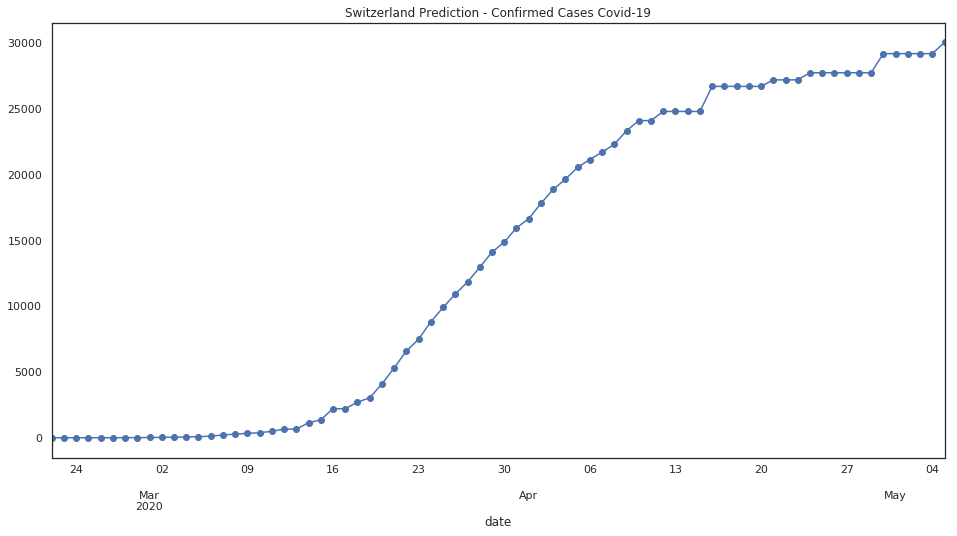

In [77]:
p4=pred['Switzerland_nan']
p4[2:].plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

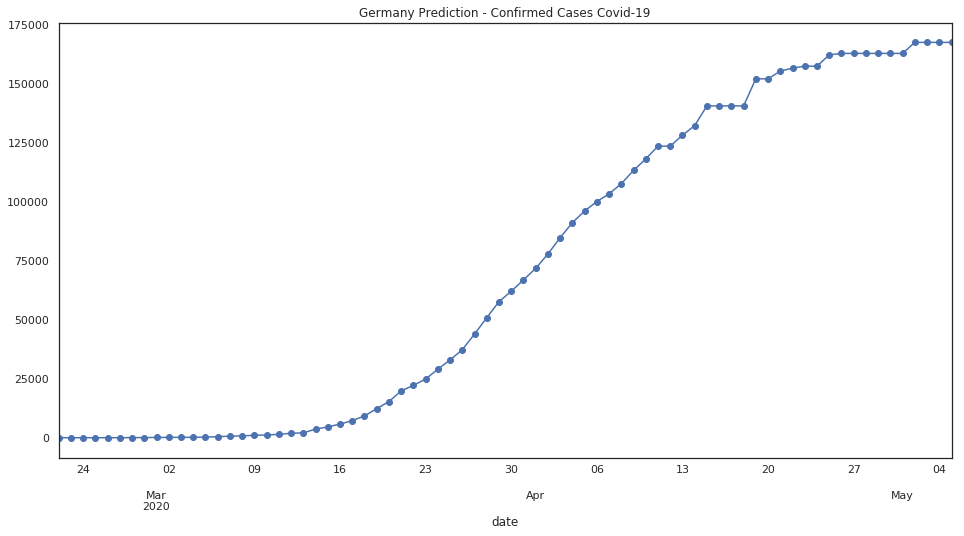

In [78]:
p5=pred['Germany_nan']
p5[2:].plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

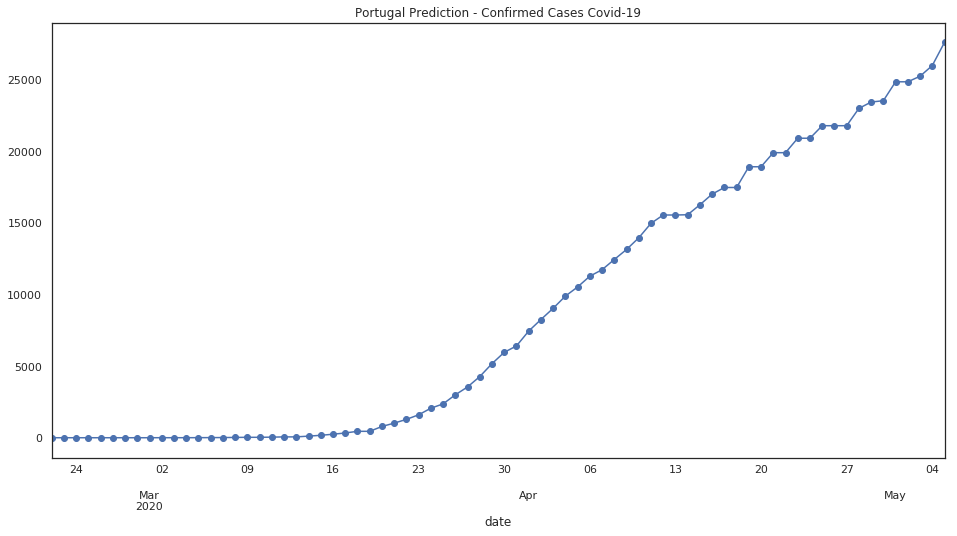

In [79]:
p6=pred['Portugal_nan']
p6[2:].plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

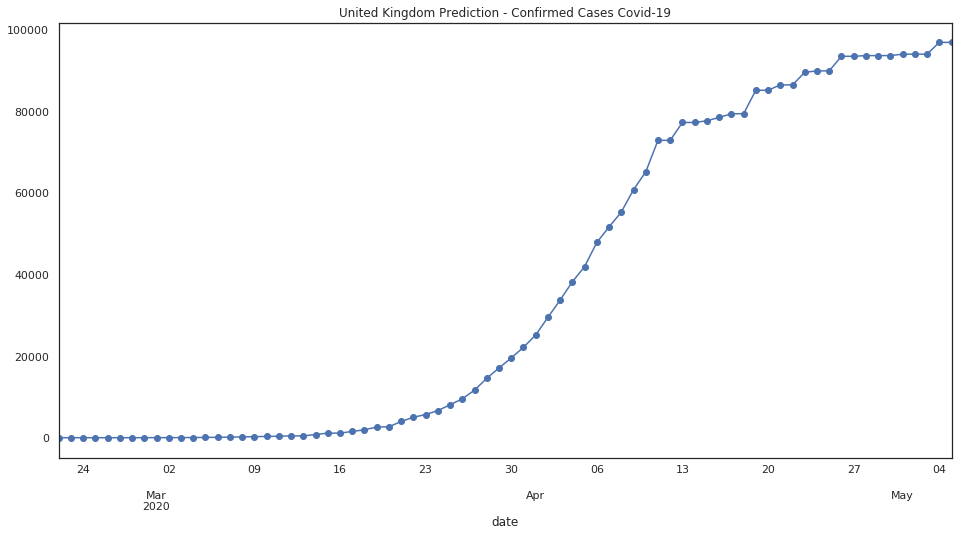

In [80]:
p8=pred['United Kingdom_nan']
p8[2:].plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

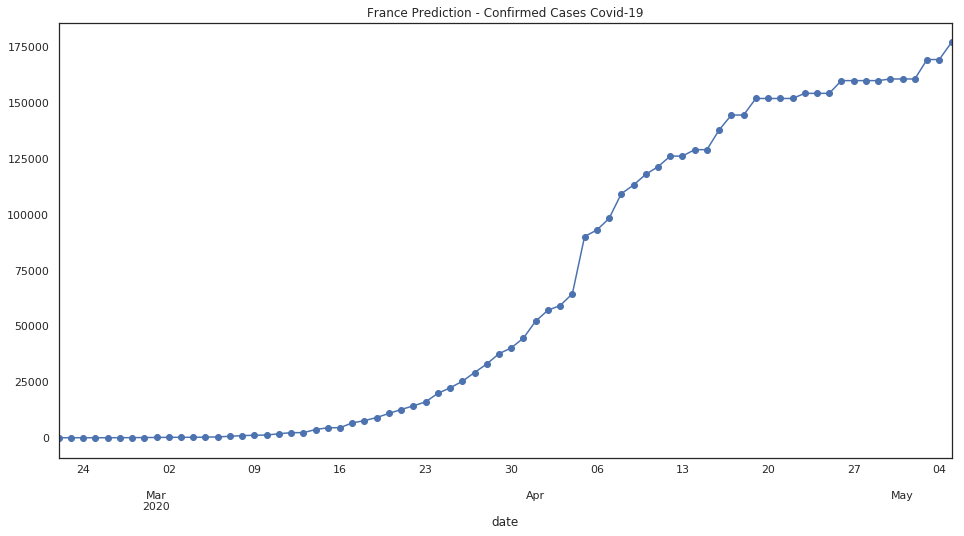

In [81]:
p9=pred['France_nan']
p9[2:].plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

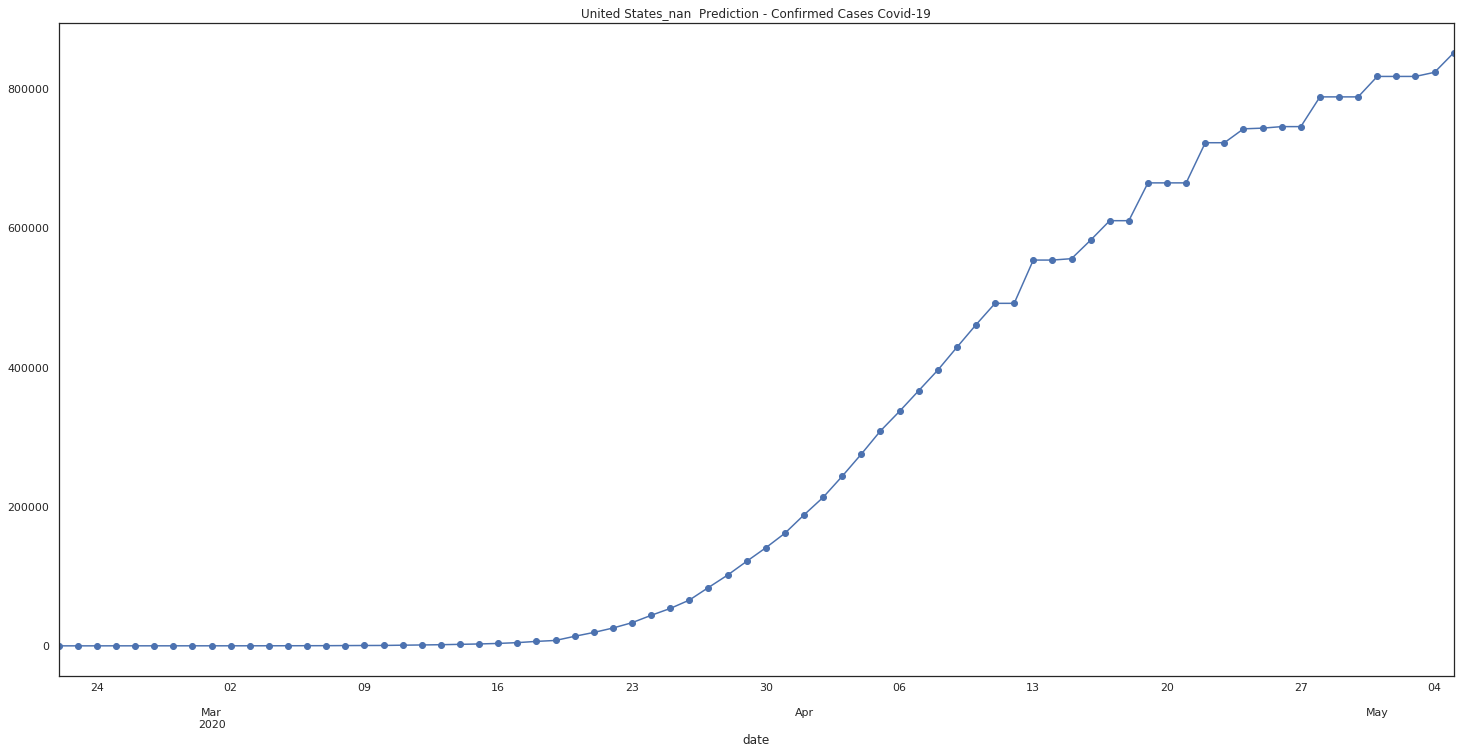

In [82]:
p10=pred['United States_nan']
p10[2:].plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

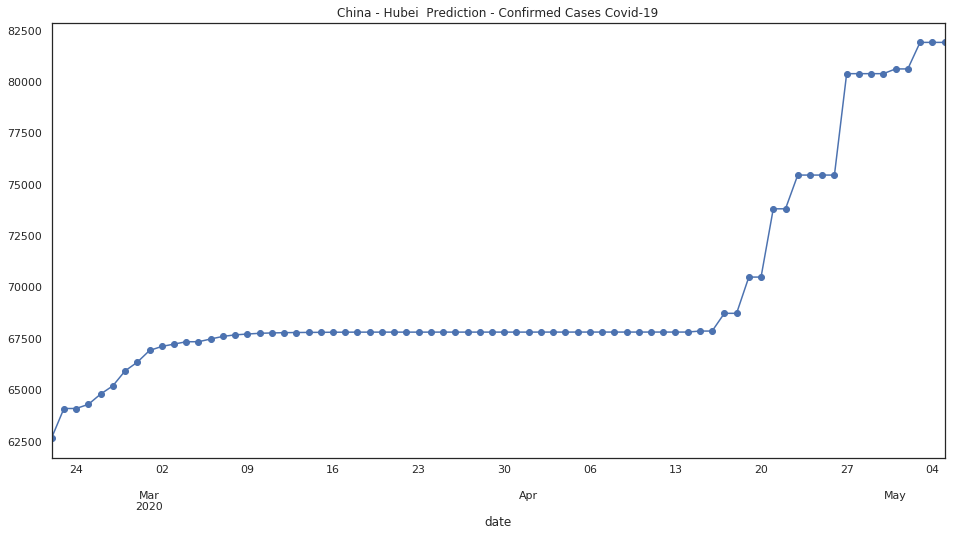

In [83]:
p11=pred['China_Hubei']
p11[2:].plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

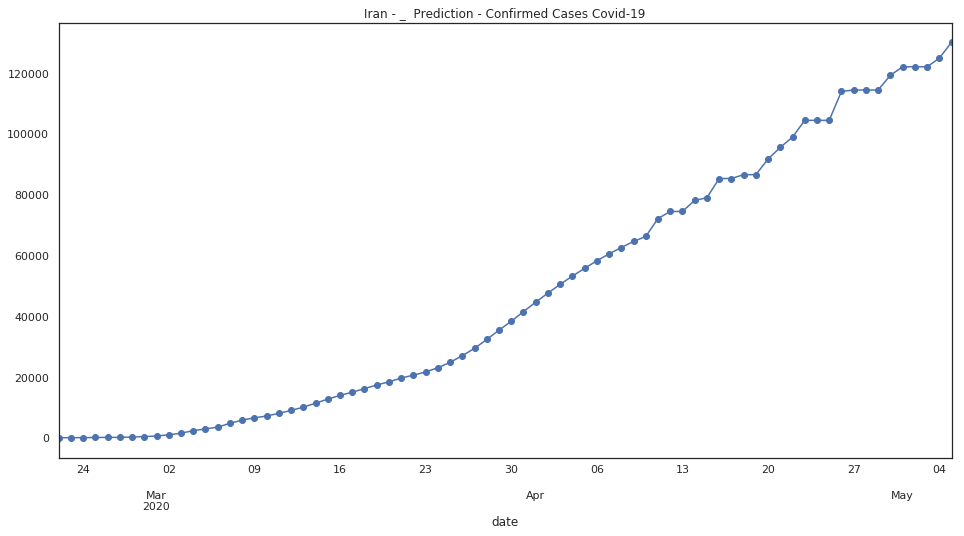

In [84]:
p12=pred['Iran_nan']
p12[2:].plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

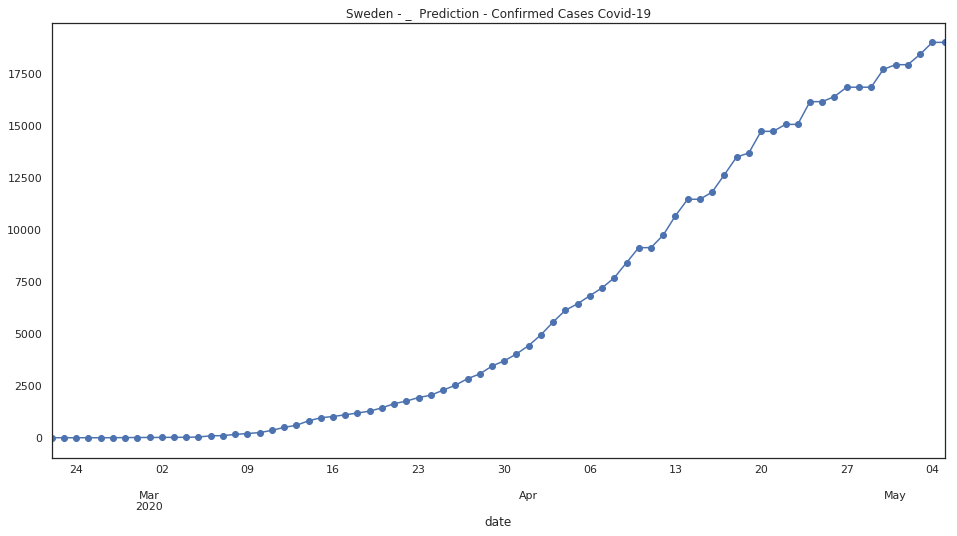

In [85]:
p13=pred['Sweden_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

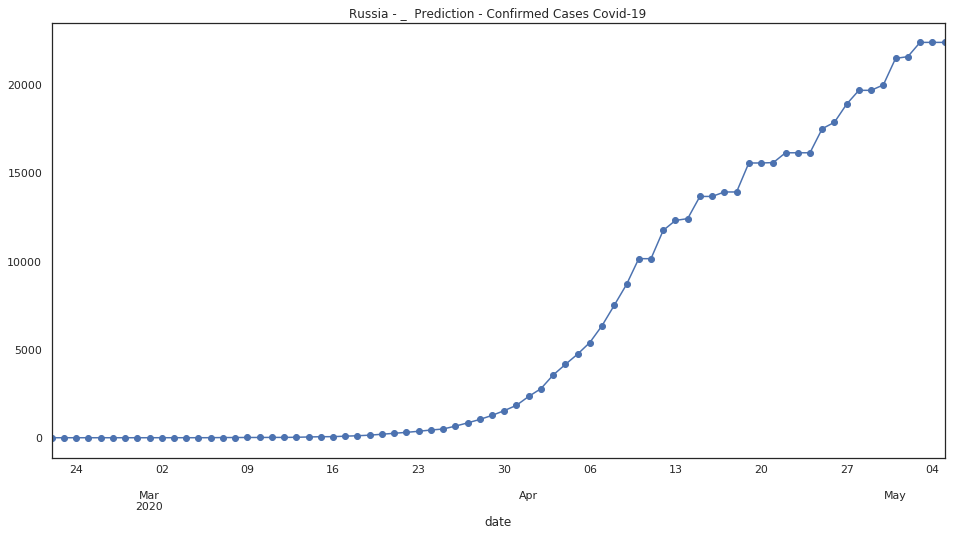

In [86]:
p13=pred['Russia_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

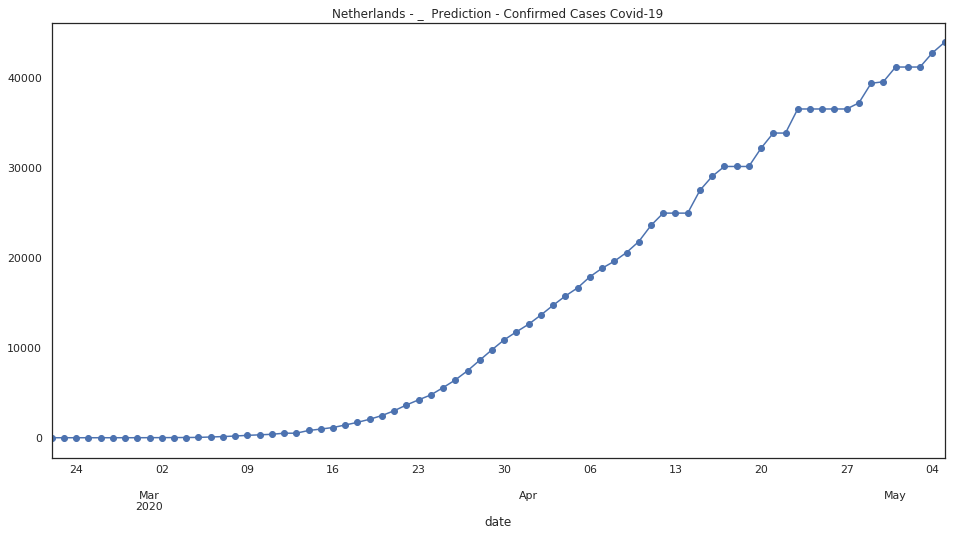

In [87]:
p14=pred['Netherlands_nan']
p14[2:].plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

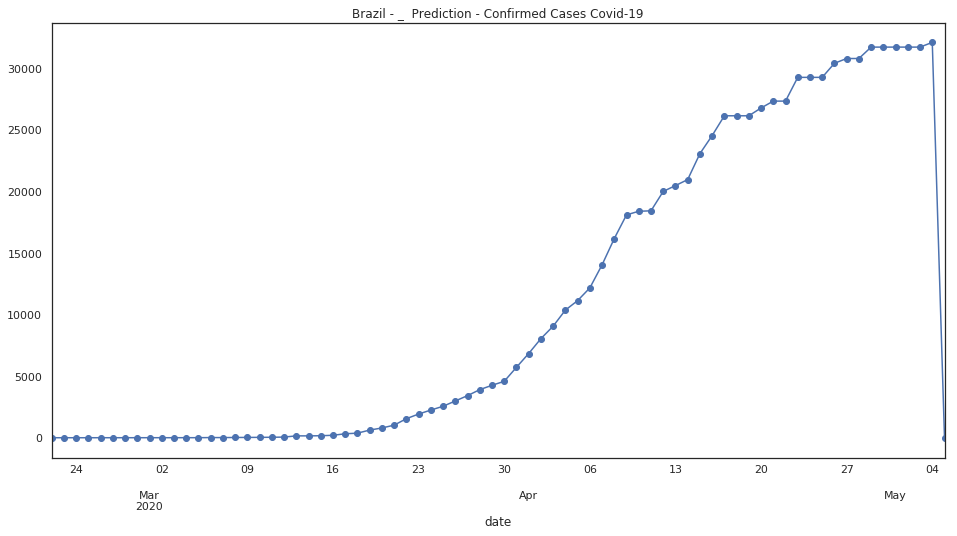

In [88]:
p15=pred['Brazil_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Brazil - _  Prediction - Confirmed Cases Covid-19')

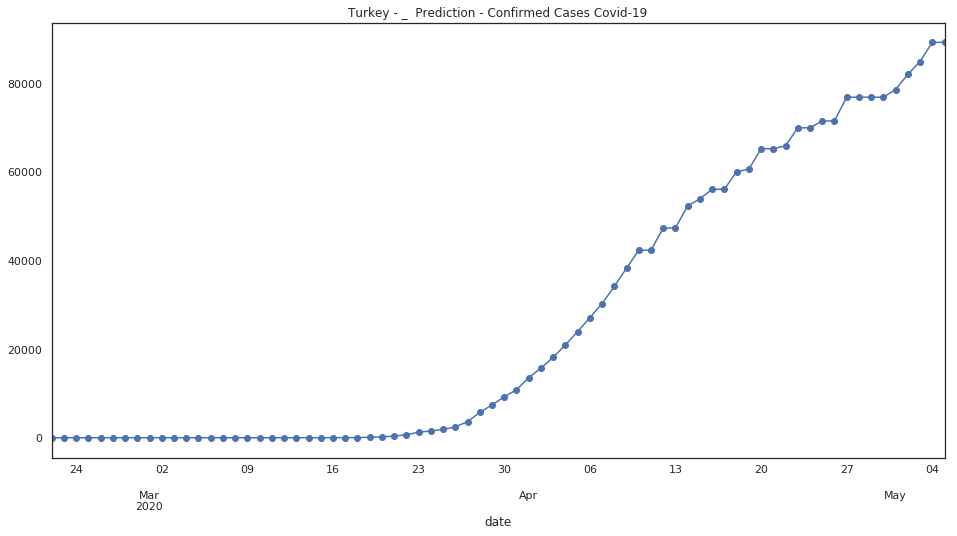

In [89]:
p15=pred['Turkey_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Turkey - _  Prediction - Confirmed Cases Covid-19')

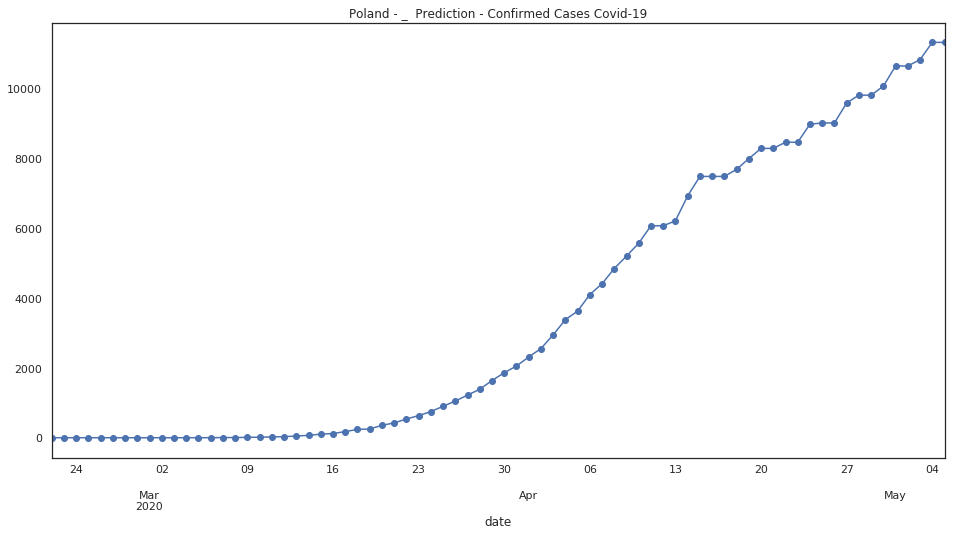

In [90]:
p15=pred['Poland_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Poland - _  Prediction - Confirmed Cases Covid-19')

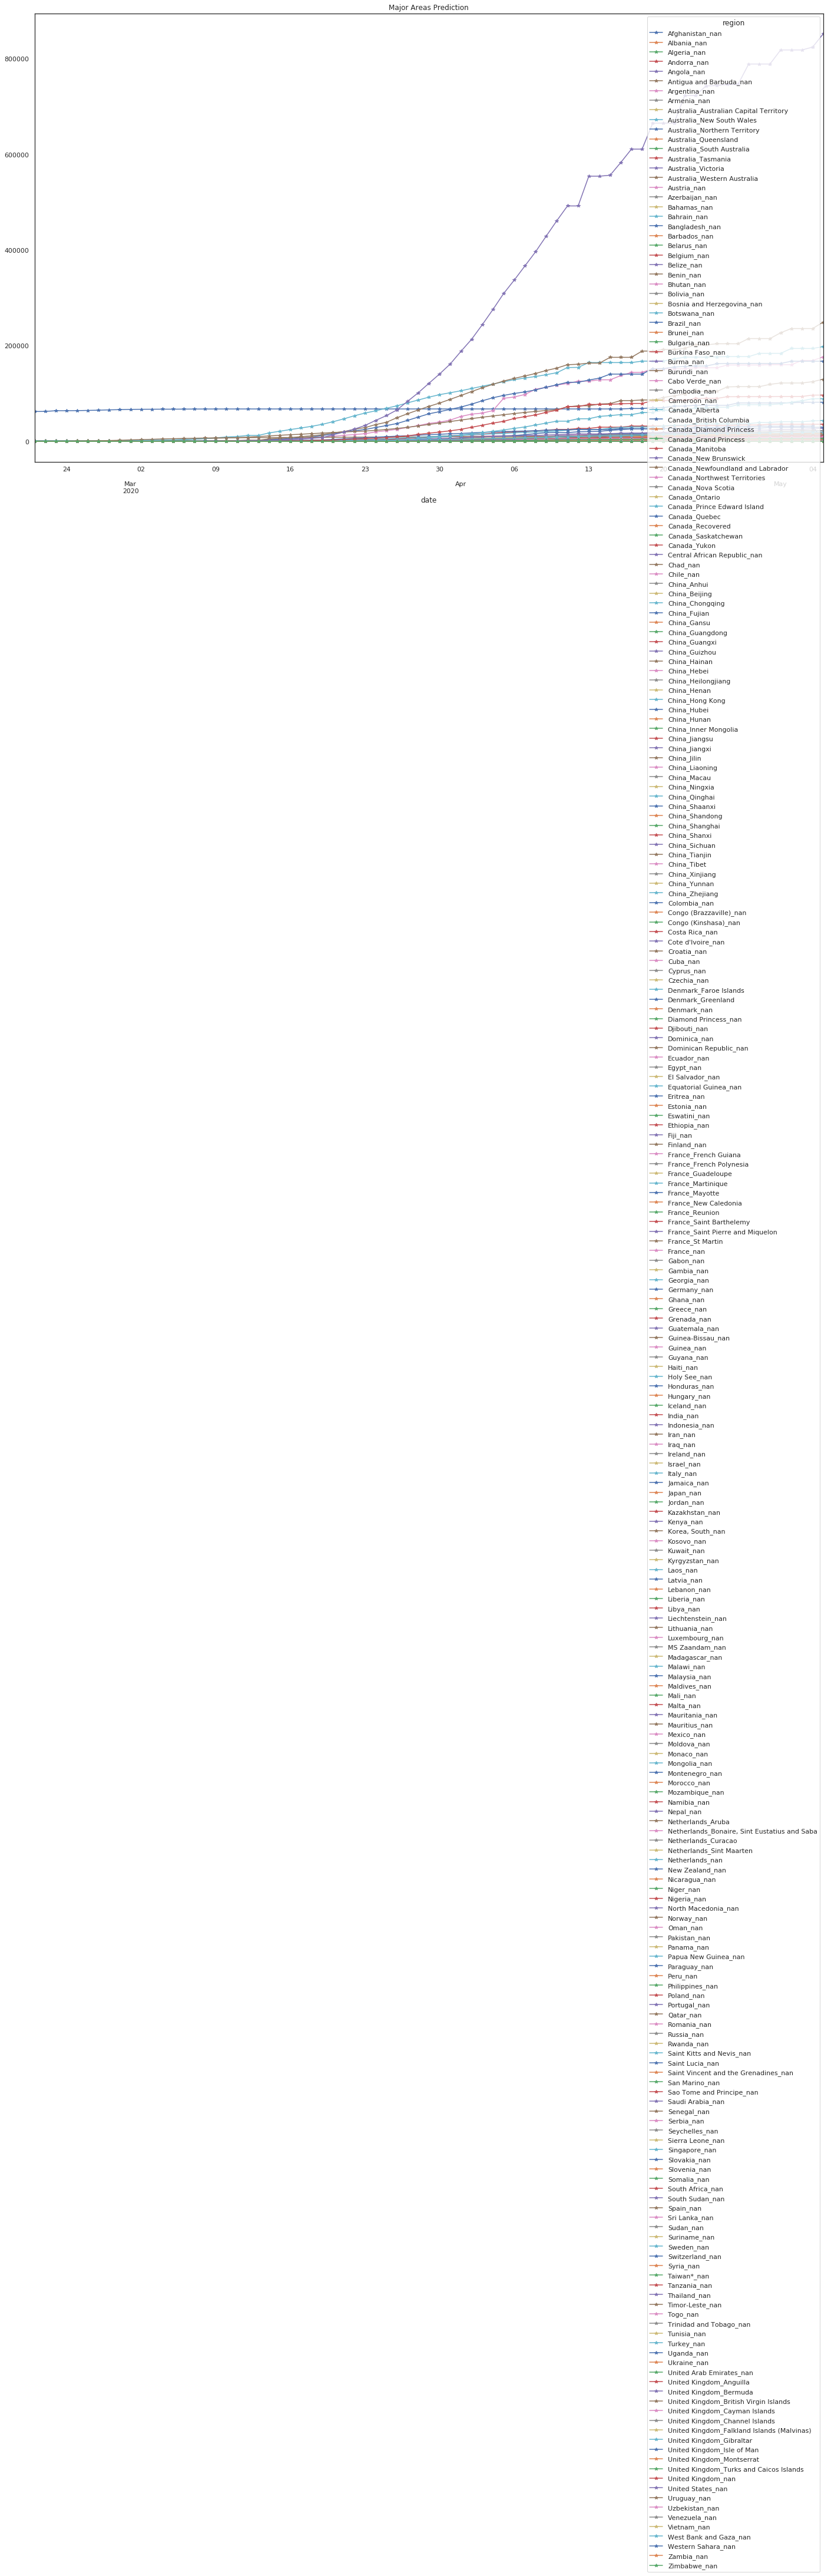

In [91]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [92]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [93]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-06            349.0        361.0       1320.0        501.0   
2020-04-07            367.0        377.0       1423.0        525.0   
2020-04-08            423.0        383.0       1468.0        545.0   
2020-04-09            444.0        400.0       1572.0        564.0   
2020-04-10            484.0        409.0       1666.0        583.0   
2020-04-11            484.0        409.0       1727.0        604.0   
2020-04-12            556.0        415.0       1808.0        604.0   
2020-04-13            557.0        415.0       1893.0        634.0   
2020-04-14            557.0        415.0       1893.0        644.0   
2020-04-15            627.0        415.0       1893.0        677.0   
2020-04-16            654.0        421.0       2069.0        691.0   
2020-04-17            669.0        436.0       2069.0        694.0   
2020-04-18            722.0        436.0       2069.0        719.0   
2020-04-19            736.0        436.0       2216.0        720.0   
2020-04-20            736.0        436.0       2216.0        720.0   
2020-04-21            818.0        440.0       2216.0        769.0   
2020-04-22            818.0        440.0       2216.0        769.0   
2020-04-23            891.0        440.0       2383.0        769.0   
2020-04-24            907.0        442.0       2383.0        769.0   
2020-04-25            962.0        442.0       2470.0        820.0   
2020-04-26            962.0        461.0       2470.0        820.0   
2020-04-27            998.0        475.0       2536.0        822.0   
2020-04-28            998.0        475.0       2536.0        867.0   
2020-04-29            998.0        475.0       2536.0        884.0   
2020-04-30           1071.0        475.0       2536.0        939.0   
2020-05-01           1105.0        486.0       2536.0        939.0   
2020-05-02           1127.0        487.0       2688.0        939.0   
2020-05-03           1127.0        487.0       2688.0        947.0   
2020-05-04           1127.0        487.0       2778.0        993.0   
2020-05-05           1217.0        487.0       2791.0       1034.0   

region      Angola_nan  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
date                                                                          
2020-04-06        14.0                     15.0         1451.0        822.0   
2020-04-07        16.0                     15.0         1554.0        833.0   
2020-04-08        17.0                     19.0         1628.0        853.0   
2020-04-09        19.0                     19.0         1715.0        881.0   
2020-04-10        19.0                     19.0         1795.0        921.0   
2020-04-11        20.0                     19.0         1795.0        967.0   
2020-04-12        22.0                     19.0         1869.0        996.0   
2020-04-13        24.0                     20.0         1945.0        996.0   
2020-04-14        24.0                     20.0         1962.0       1030.0   
2020-04-15        24.0                     21.0         1962.0       1076.0   
2020-04-16        24.0                     22.0         1976.0       1120.0   
2020-04-17        24.0                     22.0         1976.0       1120.0   
2020-04-18        25.0                     22.0         1976.0       1120.0   
2020-04-19        25.0                     23.0         1976.0       1135.0   
2020-04-20        25.0                     23.0         2069.0       1135.0   
2020-04-21        26.0                     24.0         2069.0       1207.0   
2020-04-22        26.0                     24.0         2069.0       1223.0   
2020-04-23        26.0                     24.0         2069.0       1247.0   
2020-04-24        26.0                     25.0         2069.0       1247.0   
2020-04-25        27.0                     25.0         2069.0       1247.0   
2020-04-26        27.

In [94]:
p.to_csv('/home/notebookuser/notebooks/covid19/data/p_confirmed_daily.csv', index = False, header=True)

In [95]:

#!pip install gmplot

In [96]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [97]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [98]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brazil_nan -14.235000  -51.925300   
..                                            ...        ...         ...   
235                                   Grenada_nan  12.116500  -61.679000   
236                                Mozambique_nan -18.665695   35.529562   
237                                     Syria_nan  34.802075   38.996815   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256            

In [99]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-2
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [100]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("heatmaps/Heatmap-"+datemap+".html")

In [101]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [102]:
exit()

H2O session _sid_a5cd closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
